<h1>EOSC 442 - Final Project</h1>
Members: Isaiah Youm, Bernice Huynh, Ting Gu, Yicheng Ma


In [254]:
# Import libraries to manage data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import time

<hr>
<h3>List of Functions Used</h3>

In [255]:
# Converts year and month gathered from dataset into datetime
def convert_to_datetime(year:str, month:str, index:int, DataFrame:pd.DataFrame) -> datetime.date:
    """
    year = Name of Column of Year in String (Column from DataFrame)\n
    month = Name of Column of Month in String (Column from DataFrame)\n
    index = the iteration number in a loop\n
    DataFrame = the target pandas.DataFrame\n
    """
    years = str(int(DataFrame.iloc[index][year]))
    months = str(int(DataFrame.iloc[index][month]))
    form_prep = years+'/'+months
    date_time = dt.strptime(form_prep, '%Y/%m')

    return date_time


# Reference: https://stackoverflow.com/questions/6451655/how-to-convert-python-datetime-dates-to-decimal-float-years
def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

<hr>
<h3> Setting up Data for Ice Extent </h3>

The csv file for the ice-extent data are separated by 12 months, which have their respective years from 1979 to 2022.
The year and month, however, are separated and do not have a proper index.
Therefore, when setting up this data, combining the month and year to a useable DateTime index is necessary.

<strong> Throughout this data analysis, all DateTime index should be in the form of YYYY-MM-01 </strong>

Missing values are noted with value -9999

In [256]:
# Setting-up data for Ice-Extent.
# NOTE: The csv file for the ice-extent data are separated by 12 months, which have their respective years from 1979 to 2022


# Create an empty DataFrame for the Ice-Extent data.
# Initiailizing the column names, because the pd.concat() function only works with data
# that have the same parameters/columns.
ice_extent = pd.DataFrame()

# For-loop through the twelve datasets
for num in range(1, 13):
    if num < 10:
        relative_file_path = f'./Ice Extent/N_0{num}_extent_v3.0.csv'
    else:
        relative_file_path = f'./Ice Extent/N_{num}_extent_v3.0.csv'
    data_point = pd.read_csv(relative_file_path, delimiter=',\s+', engine='python')
    # print(data_point)
    ice_extent = pd.concat([ice_extent, data_point], sort=True)

##############

# Have to change the ice_extent data to index it by YYYY_MM

# To do this, we first need to grab the year and mo to DateTime format.
datetime_iceextent = []
for num in range(0, len(ice_extent)):
    date_time = convert_to_datetime('year', 'mo', num, ice_extent)
    datetime_iceextent.append(date_time)

# Add list of datetime made to the Ice Extent DataFrame as 'DateTime'
ice_extent['DateTime'] = datetime_iceextent

# Set using pandas.DataFrame.set_index(column_name)
ice_extent = ice_extent.set_index('DateTime')

# Sort the data by DateTime (ascending chronological order)
ice_extent = ice_extent.sort_index()

# Delete redundant columns (year and mo in this case)
ice_extent = ice_extent.drop('year', axis=1)
ice_extent = ice_extent.drop('mo', axis=1)

# Create the DataFrame for the ice extent
raw_extent = ice_extent['extent']
mask_extent = raw_extent != -9999
extent = raw_extent[mask_extent]

ice_extent[mask_extent]['extent']

# Create the DataFrame for the ice area
ice_area = ice_extent['area']

<hr>
<h3> Setting up Data for Ice Thickness</h3>

<h5>Data Parameters:</h6>
<hr>
<pre>
AIR-EM_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range: 
2001 ~ 2005
- Missing Values:
-999.00, +-0.00 (Min_thkns)
</pre>
<hr>
<pre>
CanCoast_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns' 'Avg_snow' 'Min_snow' 'Max_snow' 'SD_snow'
- Data Range:
1947 ~ 2013
- Missing Value: 
-999.00
</pre>
<hr>
<pre>
CryoSat-AWI_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range:
2010 ~ 2016
- Missing Value:
-999
</pre>
<hr>
<pre>
IceBridge-QL.summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns' 'Avg_snow' 'Min_snow' 'Max_snow' 'SD_snow'
- Data Range:
2012 ~ 2015
</pre>
<hr>
<pre>
IceBridge-V2.summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns' 'Avg_snow' 'Min_snow' 'Max_snow' 'SD_snow'
- Data Range:
2009 ~ 2013
</pre>
<hr>
<pre>
ICESAT1-G_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range:
2003 ~ 2008
- Missing Value:
-999.00, +-0.00 (Min_thkns)
</pre>
<hr>
<pre>
ICESAT1-SH_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range:
2003 ~ 2008
- Missing Value:
-999.00, -5.00 & 0.00 (Min_thkns)
</pre>

In [257]:
# Setting-up data for Ice Thickness
# There are multiple data sets that we need to add together.
# We will make a DataFrame and designate a common parameter for all of them, then add all the data together.
# (Because pd.concat() only works if the columns are the same)

# Create empty DataFrame that will store all of the data
ice_thickness = pd.DataFrame()

# Create a list that contains the name of the text files we'll iterate.
ice_thickness_names = ['./Ice Thickness/AIR-EM_summaries.txt', './Ice Thickness/CanCoast_summaries.txt', './Ice Thickness/CryoSat-AWI_summaries.txt', './Ice Thickness/IceBridge-QL.summaries.txt', './Ice Thickness/IceBridge-V2.summaries.txt', './Ice Thickness/ICESAT1-G_summaries.txt', './Ice Thickness/ICESAT1-SH_summaries.txt']


# Compound all of the data together
for csvnames in ice_thickness_names:
    df = pd.read_csv(csvnames, usecols=[3, 7, 8, 9, 24, 25, 26, 27], sep='\s+', engine='python')
    ice_thickness = pd.concat([ice_thickness, df], sort=True)

# Have to change data to index it by YYYY_MM
datetime_icethkness = []
for num in range(0, len(ice_thickness)):
    date_time = convert_to_datetime('Year', 'Month', num, ice_thickness)
    datetime_icethkness.append(date_time)
ice_thickness['DateTime'] = datetime_icethkness

# Set index to DateTime
ice_thickness = ice_thickness.set_index('DateTime')


# Sort the data by DateTime (ascending chronological order)
ice_thickness = ice_thickness.sort_index()

# Delete the Year and Month columns as they are now unnecessary
ice_thickness = ice_thickness.drop('Year', axis=1)
ice_thickness = ice_thickness.drop('Month', axis=1)

# Masking Missing Values from Min_thkns. Refer to Above to check missing values.
min_thkns = ice_thickness['Min_thkns']
mask_min_thkns = min_thkns > 0
min_thkns = min_thkns[mask_min_thkns]

# Creating Average Thickness DataFrame:
avg_thkns = ice_thickness['Avg_thkns']

# Creating Max Thickness DataFrame:
max_thkns = ice_thickness['Max_thkns']

# Creating the SD Thickness DataFrame:
sd_thkns = ice_thickness['SD_thkns']

# Creating the lattitude DataFrame for ice thickness:
lat_thkns = ice_thickness['Lat']

print(ice_thickness)

            Avg_thkns    Lat     Lon  Max_thkns  Min_thkns  SD_thkns
DateTime                                                            
1947-09-01       0.12  79.98  -85.95       0.16       0.08      0.06
1947-10-01       0.33  74.72  -94.98       0.38       0.28      0.05
1947-10-01       0.35  79.98  -85.95       0.47       0.23      0.10
1947-11-01       0.54  74.72  -94.98       0.61       0.43      0.08
1947-11-01       0.66  79.98  -85.95       0.76       0.53      0.10
...               ...    ...     ...        ...        ...       ...
2016-02-01       1.26  61.70  -92.07       1.49       0.89      0.25
2016-02-01       1.33  71.80  -93.02       1.39       1.24      0.06
2016-02-01       2.27  77.17  -94.53       2.45       2.01      0.20
2016-02-01       3.37  81.72  -97.03       3.90       3.13      0.30
2016-02-01       1.89  76.24  163.35       2.06       1.73      0.15

[184728 rows x 6 columns]


<hr>
<h3> Setting up Data for Precipitation </h3>

<strong>cmap-mean.csv</strong> has LOTS of data that are unnecessary for this data analysis.

We only need data from lat 60 to 90 since that's the average lattitude we're searching for.
This is because the Arctic is around 76' latttiude, and we want some leniency in the collection of our data.
Therefore, we gather from 60' lat to 90' lat.

In [258]:
# Setting up data for Precipitation

# Reading the raw cmap-means.csv.
# Objective: Filter out all data outside of lattitude 60 ~ 90
# precipitation = pd.read_csv('./Precipitation/cmap-mean.csv')
# print(f"{len(precipitation)} = total number of data in original csv file.")

precipitation = pd.read_csv('./Precipitation/66-90_latitude.csv')

# There's more data thats outside of the 60 ~ 90 range. 
# To optimize the code, it is better to make the if condition 60 and below.

# for num in range(0, len(precipitation)):
#     if precipitation.iloc[num]['lat'] < 60:
#         precipitation = precipitation[:num]

#         break

# print(f"{len(precipitation)} = the number of leftover data-points after filter")

# Need to set the YYYY-MM-DD as the index for the precipitation data.
# Doing this now, because iterating through a DateTime is difficult for the procedures above.
# We'll leave an unindexed version of the data in case we need to use the time as a column.
precipitation['time'] = pd.to_datetime(precipitation['time'])
precipitation_unindexed = precipitation
precipitation = precipitation.set_index('time')

# Sort the data by DateTime (ascending chronological order)
precipitation = precipitation.sort_index()

# Create DataFrame for the precipitation
precip_data = precipitation['precip']

# Create lattitude data for the precipitation
lat_precip = precipitation['lat']


<h4 style='color:cyan;'> Only run this code if you need to save a new .csv file (with <strong>filtered</strong> data from <strong>cmap-mean.csv</strong>))</h4>

Export to a csv file with wanted range of data. <br>
Un-necessary, but am doing this so we don't have a humongous data set to download.<br>
<p><code>precipitation.to_csv("./Precipitation/filtered_precipitation_data.csv", index=False)</code></p>

<hr>
<h3>Extracted Data List</h3>
Information attained from each respective documentation.

<pre>
<p></p>
<strong>Ice Extent (1979 - 2022 Sep)</strong>
Ice Extent                 extent               M * km^2 (millions sq km)
    + Mask:                mask_extent
Ice Area                   ice_area             M * km^2 (millions sq km)
<p></p>
<hr>
<strong>Ice Thickness (1947 - 2016 Feb)</strong>
Average Ice Thickness      avg_thkns            m (meters)
Max Ice Thickness          max_thkns            m (meters)
Min Ice Thickness          min_thkns            m (meters)
    + Mask:                mask_min_thkns
SD Ice Thickness           sd_thkns             m (meters)
Lat for Ice Thickness      lat_thkns            lat (N)
<p></p>
<hr>
<strong>Precipitation (1978 - 2022 Aug)</strong>
Precipitation              precip_data          mm / day
Lat for Precipitation      lat_precip           lat (N) 


precipitation_unindexed = Time left in columns of DataFrame
<p></p>
</pre>

<h3>Raw Data - Ice Extent Scatterplot</h3>

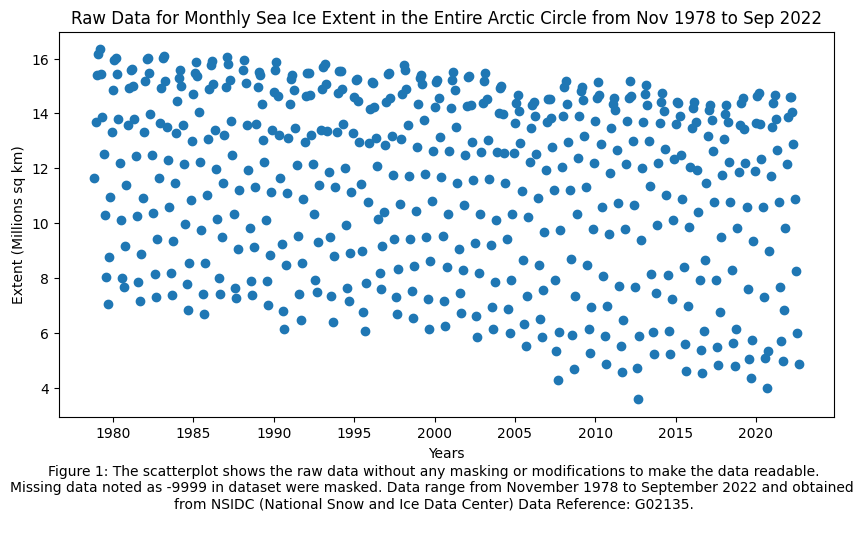

In [259]:
## PLOTTING RAW DATA TO A SCATTERPLOT TO UNDERSTAND THE OVERLAY OF IT BETTER.

plt.figure(figsize=(10, 5))
plt.scatter(extent.index, extent)
plt.xlabel("Years")
plt.ylabel("Extent (Millions sq km)")
plt.title("Raw Data for Monthly Sea Ice Extent in the Entire Arctic Circle from Nov 1978 to Sep 2022")
plt.figtext(0.5, -0.1, "Figure 1: The scatterplot shows the raw data without any masking or modifications to make the data readable.\n" +
                       "Missing data noted as -9999 in dataset were masked. Data range from November 1978 to September 2022 and obtained \n" + 
                       "from NSIDC (National Snow and Ice Data Center) Data Reference: G02135.\n"
                       , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<h3>Raw Data - Ice Thickness Scatterplot</h3>

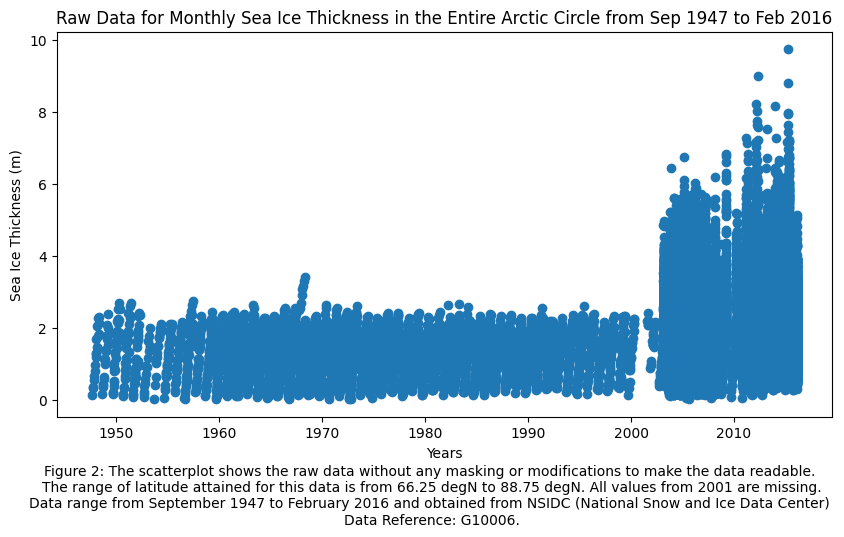

In [260]:
## PLOTTING RAW DATA TO A SCATTERPLOT TO UNDERSTAND THE OVERLAY OF IT BETTER.

plt.figure(figsize=(10, 5))
plt.scatter(avg_thkns.index, avg_thkns)
plt.xlabel("Years")
plt.ylabel("Sea Ice Thickness (m)")
plt.title("Raw Data for Monthly Sea Ice Thickness in the Entire Arctic Circle from Sep 1947 to Feb 2016")
plt.figtext(0.5, -0.1, "Figure 2: The scatterplot shows the raw data without any masking or modifications to make the data readable. \n" +
                        "The range of latitude attained for this data is from 66.25 degN to 88.75 degN. All values from 2001 are missing.\n" +
                        "Data range from September 1947 to February 2016 and obtained from NSIDC (National Snow and Ice Data Center) \n" +
                        "Data Reference: G10006." 
                        , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<h3>Raw Data - Rainfall Scatterplot</h3>

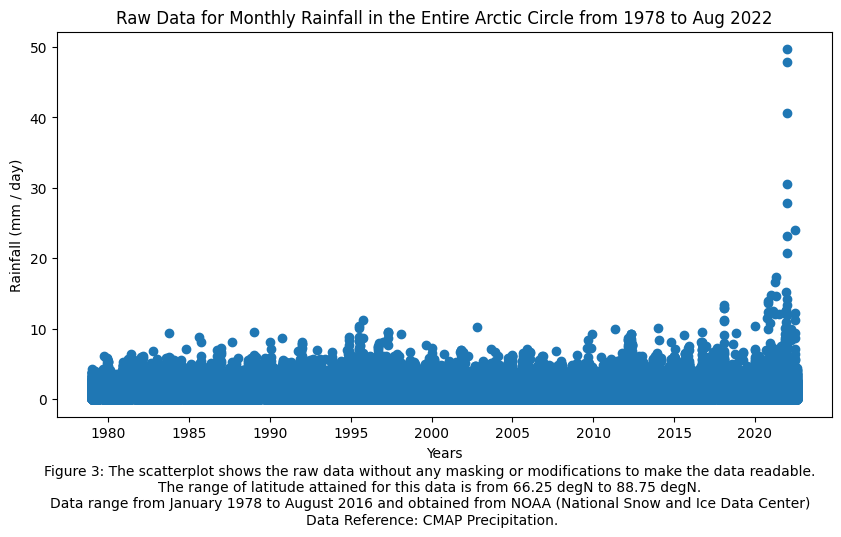

In [261]:
## PLOTTING RAW DATA TO A SCATTERPLOT TO UNDERSTAND THE OVERLAY OF IT BETTER.

plt.figure(figsize=(10, 5))
plt.scatter(precip_data.index, precip_data)
plt.xlabel("Years")
plt.ylabel("Rainfall (mm / day)")
plt.title("Raw Data for Monthly Rainfall in the Entire Arctic Circle from 1978 to Aug 2022")
plt.figtext(0.5, -0.1, "Figure 3: The scatterplot shows the raw data without any masking or modifications to make the data readable. \n" +
                       "The range of latitude attained for this data is from 66.25 degN to 88.75 degN. \n" +
                       "Data range from January 1978 to August 2016 and obtained from NOAA (National Snow and Ice Data Center) \n" +
                       "Data Reference: CMAP Precipitation." 
                        , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<h3>Data Analysis - Ice Extent Graph</h3>

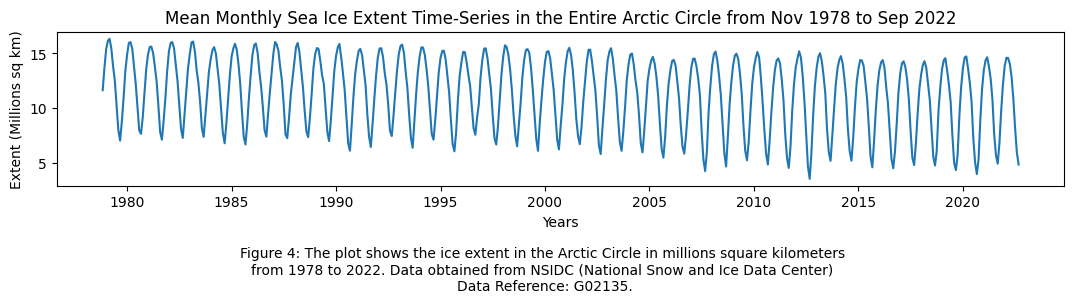

In [262]:
## MEAN MONTHLY TIME-SERIES OF ICE EXTENT IN THE ARCTIC CIRCLE

plt.figure(figsize=(13, 2))
plt.plot(extent)
plt.xlabel("Years")
plt.ylabel("Extent (Millions sq km)")
plt.title("Mean Monthly Sea Ice Extent Time-Series in the Entire Arctic Circle from Nov 1978 to Sep 2022")
plt.figtext(0.5, -0.4, "Figure 4: The plot shows the ice extent in the Arctic Circle in millions square kilometers \n" +
                        "from 1978 to 2022. Data obtained from NSIDC (National Snow and Ice Data Center) \n" +
                        "Data Reference: G02135."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

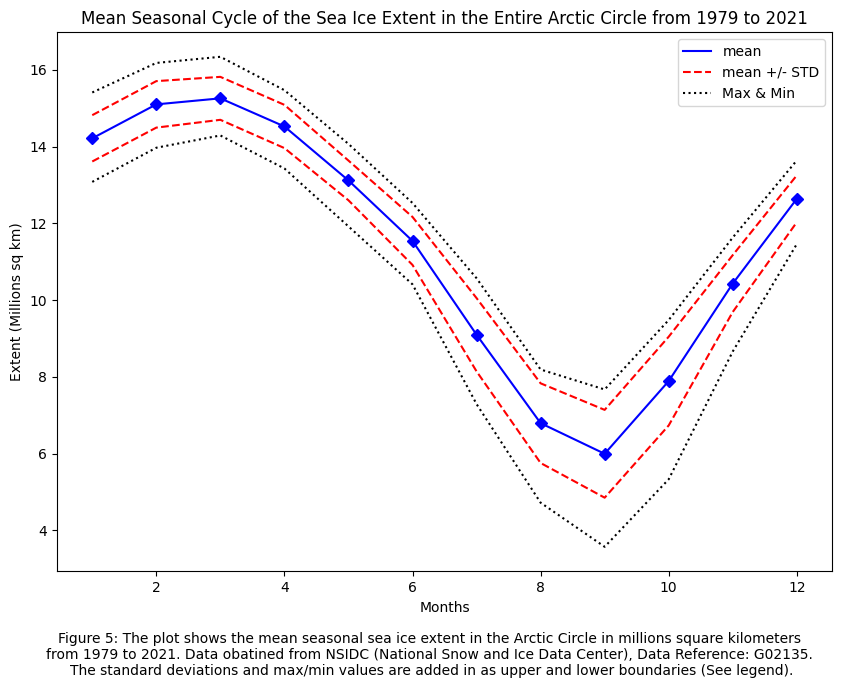

In [263]:
## MEAN SEASONAL CYCLE OF ARCTIC ICE-EXTENT

# Need to mask the missing values from the DataFrame.
monthly_ice_extent = ice_extent[mask_extent]

# Need to mask unwanted date ranges from the DataFrame.
monthly_ice_extent = monthly_ice_extent[(monthly_ice_extent.index > '1978-12-01') & (monthly_ice_extent.index < '2022-01-01')]

# Get the mean of all values of each month in every year.
extent_monthly_annual_cycle = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].mean()

# Get the standard deviation of the ice extent for each month in every year.
extent_std = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].std()

# Get the maximum value of the ice extent for each month in every year.
extent_max = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].max()

# Get the minimum value of the ice extent for each month in every year.
extent_min = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].min()

# Calculate upper std boundary and lower std boundary for graph.
extent_upper_std = extent_monthly_annual_cycle + extent_std
extent_lower_std = extent_monthly_annual_cycle - extent_std

# Create Two Subplots to show a generic trend in the top graph and a more in-depth analysis on the bottom.
# fig1, (ax1, ax12, ax2) = plt.subplots(3,1,figsize=[10,10])

# Subplot with general trend
# ax1.plot(extent_monthly_annual_cycle)
# ax1.set_title("Mean Seasonal Cycle of the Ice Extent in the Entire Arctic Circle from 1979 to 2021")
# ax1.set_xlabel("Months")
# ax1.set_ylabel("Extent (Millions sq km)")

# Subplot with anomalies and min/max values plotted.
# ax12.plot(extent_monthly_annual_cycle, color='b', label='mean', linestyle='-')
# ax12.plot(extent_monthly_annual_cycle, 'bD')
# ax12.plot(extent_upper_std, color='r', label='mean +/- STD', linestyle='--')
# ax12.plot(extent_lower_std, color='r', linestyle='--')
# ax12.legend()
# ax12.plot(extent_max, color ='k', label='Max & Min', linestyle=':')
# ax12.plot(extent_min, color ='k', linestyle=':')
# ax12.set_xlabel("Months")
# ax12.set_ylabel("Extent (Millions sq km)")

# Subplot with anomalies and min/max values plotted.
plt.figure(figsize=(10, 7))
plt.title("Mean Seasonal Cycle of the Sea Ice Extent in the Entire Arctic Circle from 1979 to 2021")
plt.plot(extent_monthly_annual_cycle, color='b', label='mean', linestyle='-')
plt.plot(extent_monthly_annual_cycle, 'bD')
plt.plot(extent_upper_std, color='r', label='mean +/- STD', linestyle='--')
plt.plot(extent_lower_std, color='r', linestyle='--')
plt.plot(extent_max, color ='k', label='Max & Min', linestyle=':')
plt.plot(extent_min, color ='k', linestyle=':')
plt.xlabel("Months")
plt.ylabel("Extent (Millions sq km)")
plt.figtext(0.5, -0.035, "Figure 5: The plot shows the mean seasonal sea ice extent in the Arctic Circle in millions square kilometers \n"
                        + "from 1979 to 2021. Data obatined from NSIDC (National Snow and Ice Data Center), Data Reference: G02135. \n"
                        + "The standard deviations and max/min values are added in as upper and lower boundaries (See legend)."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()
# ax2.legend()


<h3>Data Analysis - Precipitation Graph</h3>

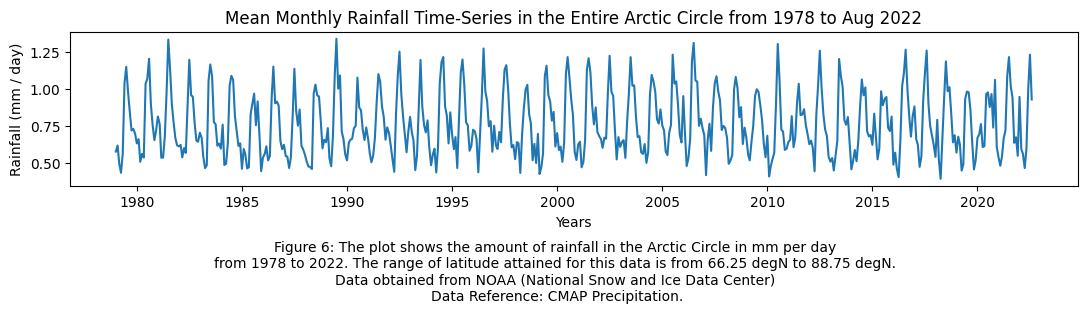

In [264]:
## MEAN MONTHLY TIME-SERIES OF PRECIPITATION IN THE ARCTIC CIRCLE

# There are TOO many values for each time point, and thus we will average all of the points.
# This is because we are also measuring data from various latitudes that we defined to be in the Arctic Circle.

# Use the pd.df.groupby() function to accumulate data
precipitation_mean_monthly_values = precipitation_unindexed.groupby(precipitation_unindexed.time.dt.to_period('M')).mean()
precipitation_mean_monthly_raw = precipitation_mean_monthly_values.to_timestamp()

# Isolate the specific column of data we need, which is 'precip' in this case.
precipitation_mean_monthly = precipitation_mean_monthly_raw['precip']

plt.figure(figsize=(13, 2))
plt.plot(precipitation_mean_monthly)
plt.xlabel("Years")
plt.ylabel("Rainfall (mm / day)")
plt.title("Mean Monthly Rainfall Time-Series in the Entire Arctic Circle from 1978 to Aug 2022")
plt.figtext(0.5, -0.45, "Figure 6: The plot shows the amount of rainfall in the Arctic Circle in mm per day \n"
                        + "from 1978 to 2022. The range of latitude attained for this data is from 66.25 degN to 88.75 degN. \n" +
                        "Data obtained from NOAA (National Snow and Ice Data Center) \n" +
                        "Data Reference: CMAP Precipitation."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

Text(0.5, -0.055, 'Figure 7: The plot shows the mean seasonal rainfall in the Arctic Circle in millions square kilometers \nfrom 1978 to 2021. The range of latitude attained for this data is from 61.25 degN to 88.75 degN \nData obatined from NOAA (National Oceanic and Atmospheric Administration). Data Reference: CMAP Precipitation.\nThe standard deviations are added in as upper and lower boundaries (See legend).')

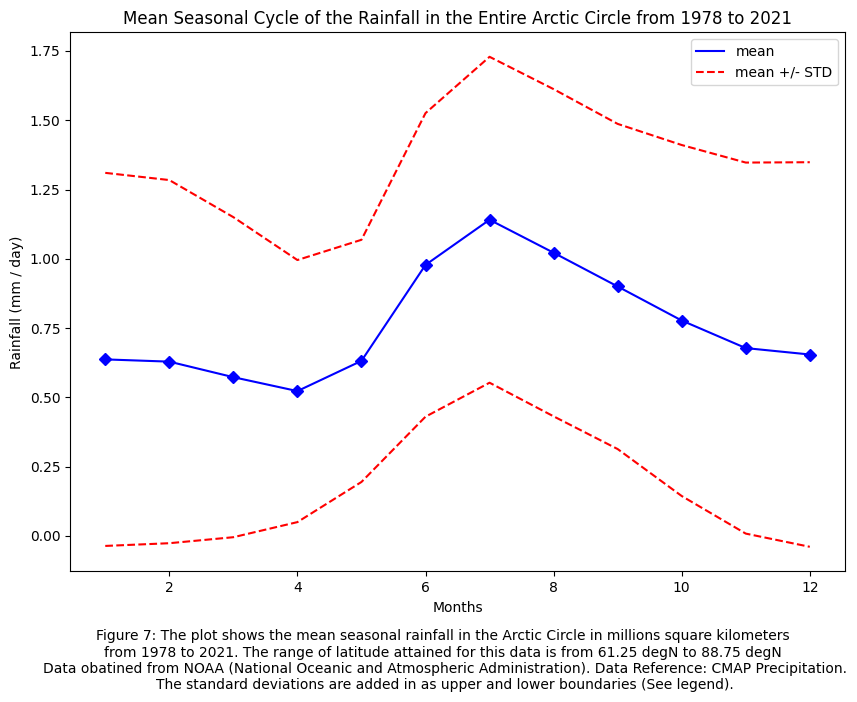

In [265]:
## MEAN SEASONAL CYCLE OF PRECIPITATION IN THE ARCTIC Circle (LAT 61.25 TO LAT 88.75)


# Need to mask unwanted date ranges from the DataFrame.
monthly_precip = precipitation[(precipitation.index < '2022-01-01')]

# Get the mean of all values of each month in every year.
precip_monthly_annual_cycle = monthly_precip.groupby(monthly_precip.index.month)['precip'].mean()

# Get the standard deviation of the precipitation for each month in every year.
precip_std = monthly_precip.groupby(monthly_precip.index.month)['precip'].std()

# Get the maximum value of the precipitation for each month in every year.
precip_max = monthly_precip.groupby(monthly_precip.index.month)['precip'].max()

# Get the minimum value of the precipitation for each month in every year.
precip_min = monthly_precip.groupby(monthly_precip.index.month)['precip'].min()

# Calculate upper std boundary and lower std boundary for graph.
precip_upper_std = precip_monthly_annual_cycle + precip_std
precip_lower_std = precip_monthly_annual_cycle - precip_std

# Create Two Subplots to show a generic trend in the top graph and a more in-depth analysis on the bottom.
# fig2, (ax3, ax35, ax4) = plt.subplots(3,1,figsize=[10, 10])

# Subplot with general trend.
# ax3.plot(precip_monthly_annual_cycle)
# ax3.set_xlabel("Months")
# ax3.set_ylabel("Rainfall (mm / day)")
# ax3.set_title("Mean Seasonal Cycle of the Rainfall in the Entire Arctic Circle from 1978 to 2021")

# Subplot with anomalies and min/max values plotted.
plt.figure(figsize=(10,7))
plt.title("Mean Seasonal Cycle of the Rainfall in the Entire Arctic Circle from 1978 to 2021")
plt.plot(precip_monthly_annual_cycle, color='b', label='mean', linestyle='-')
plt.plot(precip_monthly_annual_cycle, 'bD')
plt.plot(precip_upper_std, color='r', label='mean +/- STD', linestyle='--')
plt.plot(precip_lower_std, color='r', linestyle='--')
# ax35.plot(precip_max, color ='k', label='Max & Min', linestyle=':')
# ax35.plot(precip_min, color ='k', linestyle=':')
plt.legend()
plt.xlabel("Months")
plt.ylabel("Rainfall (mm / day)")

# Subplot with anomalies and min/max values plotted.
# ax4.plot(precip_monthly_annual_cycle, color='b', label='mean', linestyle='-')
# ax4.plot(precip_monthly_annual_cycle, 'bD')
# ax4.plot(precip_upper_std, color='r', label='mean +/- STD', linestyle='--')
# ax4.plot(precip_lower_std, color='r', linestyle='--')
# ax4.plot(precip_max, color ='k', label='Max & Min', linestyle=':')
# ax4.plot(precip_min, color ='k', linestyle=':')
# ax4.set_xlabel("Months")
# ax4.set_ylabel("Rainfall (mm / day)")
plt.figtext(0.5, -0.055,  "Figure 7: The plot shows the mean seasonal rainfall in the Arctic Circle in millions square kilometers \n" +
                        "from 1978 to 2021. The range of latitude attained for this data is from 61.25 degN to 88.75 degN \n" +
                        "Data obatined from NOAA (National Oceanic and Atmospheric Administration). Data Reference: CMAP Precipitation.\n" +
                        "The standard deviations are added in as upper and lower boundaries (See legend).",
            wrap=True, horizontalalignment='center', fontsize=10)
# ax4.legend()



<h3>Data Analysis - Ice Thickness Graph</h3>

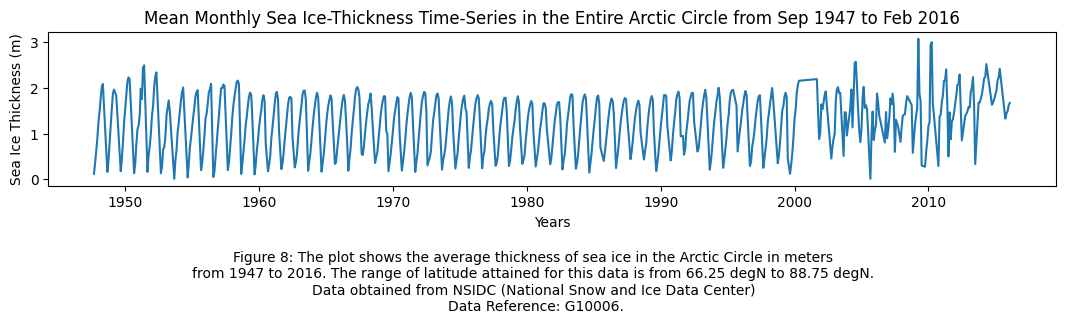

In [266]:
## MEAN MONTHLY TIME-SERIES OF ICE THICKNESS IN THE ARCTIC CIRCLE

# Use the pd.df.groupby() function to accumulate data
avg_thkns_mean_monthly_values = avg_thkns.groupby(avg_thkns.index.to_period('M')).mean()
avg_thkns_mean_monthly = avg_thkns_mean_monthly_values.to_timestamp()

plt.figure(figsize=(13, 2))
plt.plot(avg_thkns_mean_monthly)
plt.xlabel("Years")
plt.ylabel("Sea Ice Thickness (m)")
plt.title("Mean Monthly Sea Ice-Thickness Time-Series in the Entire Arctic Circle from Sep 1947 to Feb 2016")
plt.figtext(0.5, -0.5, "Figure 8: The plot shows the average thickness of sea ice in the Arctic Circle in meters \n" +
                        "from 1947 to 2016. The range of latitude attained for this data is from 66.25 degN to 88.75 degN. \n" +
                        "Data obtained from NSIDC (National Snow and Ice Data Center) \n" +
                        "Data Reference: G10006."
                        , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

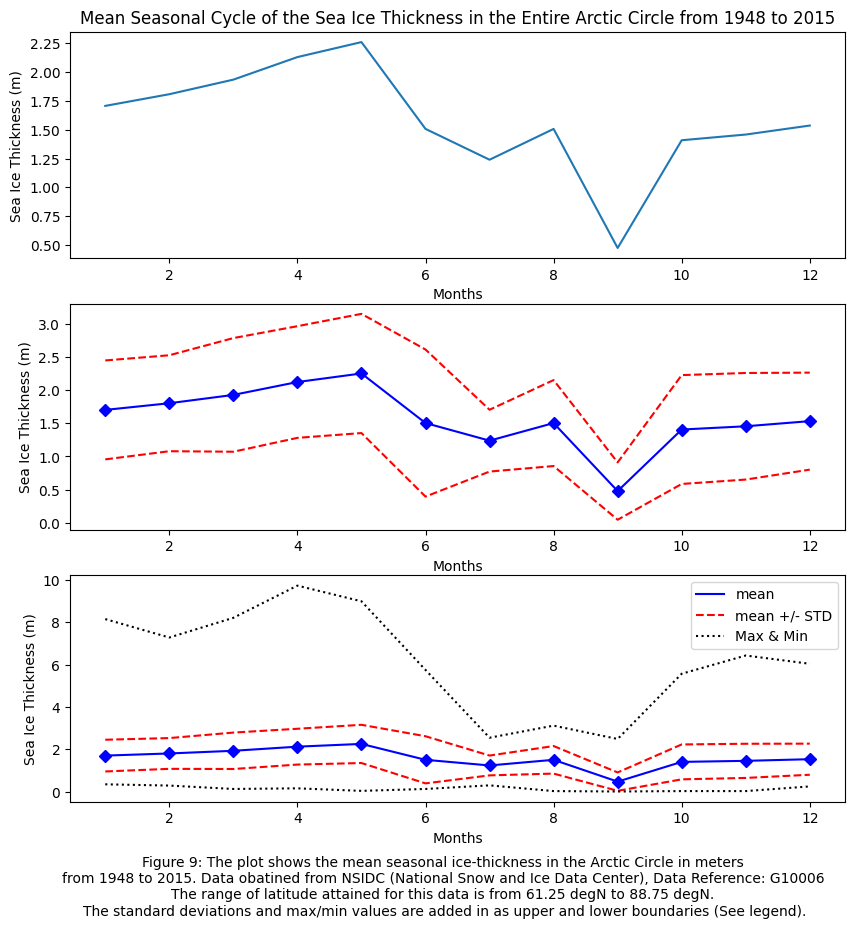

In [267]:
## MEAN SEASONAL CYCLE OF ICE-THICKNESS IN THE ARCTIC CIRCLE

# Need to mask unwanted date ranges from the DataFrame.
ice_thickness_masked = ice_thickness[(ice_thickness.index > '1947-12-01') & (ice_thickness.index < '2016-01-01')]

# Get the mean of all values of each month in every year.
avg_thkns_seasonal_mean = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].mean()

# Get the standard deviation of the average thickness for each month in every year.
avg_thkns_std = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].std()

# Get the maximum value of the average ice thickness for each month in every year.
avg_thkns_max = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].max()

# Get the minimum value of the average ice thickness for each month in every year.
avg_thkns_min = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].min()

# Calculate upper std boundary and lower std boundary for graph.
avg_thkns_upper_std = avg_thkns_seasonal_mean + avg_thkns_std
avg_thkns_lower_std = avg_thkns_seasonal_mean - avg_thkns_std

# Create Two Subplots to show a generic trend in the top graph and a more in-depth analysis on the bottom.
fig3, (ax5, ax56, ax6) = plt.subplots(3,1,figsize=[10, 10])

# Subplot with general trend.
ax5.plot(avg_thkns_seasonal_mean)
ax5.set_xlabel("Months")
ax5.set_ylabel("Sea Ice Thickness (m)")
ax5.set_title("Mean Seasonal Cycle of the Sea Ice Thickness in the Entire Arctic Circle from 1948 to 2015")

# Subplot with anomalies and min/max values plotted
ax56.plot(avg_thkns_seasonal_mean, color='b', label='mean', linestyle='-')
ax56.plot(avg_thkns_seasonal_mean, 'bD')
ax56.plot(avg_thkns_upper_std, color='r', label='mean +/- STD', linestyle='--')
ax56.plot(avg_thkns_lower_std, color='r', linestyle='--')
# ax56.plot(avg_thkns_max, color ='k', label='Max & Min', linestyle=':')
# ax56.plot(avg_thkns_min, color ='k', linestyle=':')
ax56.set_xlabel("Months")
ax56.set_ylabel("Sea Ice Thickness (m)")

# Subplot with anomalies and min/max values plotted
ax6.plot(avg_thkns_seasonal_mean, color='b', label='mean', linestyle='-')
ax6.plot(avg_thkns_seasonal_mean, 'bD')
ax6.plot(avg_thkns_upper_std, color='r', label='mean +/- STD', linestyle='--')
ax6.plot(avg_thkns_lower_std, color='r', linestyle='--')
ax6.plot(avg_thkns_max, color ='k', label='Max & Min', linestyle=':')
ax6.plot(avg_thkns_min, color ='k', linestyle=':')
ax6.set_xlabel("Months")
ax6.set_ylabel("Sea Ice Thickness (m)")
plt.figtext(0.5, -0.001, "Figure 9: The plot shows the mean seasonal ice-thickness in the Arctic Circle in meters \n" +
                       "from 1948 to 2015. Data obatined from NSIDC (National Snow and Ice Data Center), Data Reference: G10006 \n" +
                       "The range of latitude attained for this data is from 61.25 degN to 88.75 degN. \n" +
                       "The standard deviations and max/min values are added in as upper and lower boundaries (See legend).",
            wrap=True, horizontalalignment='center', fontsize=10)
ax6.legend()


<hr>

<h3>Statistical Analysis</h3>

In [268]:
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

<h3>Overall Data with Trend, R-Squared and Two-Tailed p-Value Annotation</h3>


In [269]:
## Prepare all data for Package: Statsmodels.api
# - Ice-Extent
date_extent_regression = ice_extent[mask_extent].index.to_julian_date()
date_extent = ice_extent[mask_extent].index
extent_decimal = []
for date in date_extent:
    extent_decimal.append(toYearFraction(date))

extent = ice_extent[mask_extent]['extent'].values

# - Ice-Thickness
avg_thkns = ice_thickness['Avg_thkns'].values
date_thkns_regression = ice_thickness.index.to_julian_date()
date_thkns = ice_thickness.index
thkns_decimal = []
for date in date_thkns:
    thkns_decimal.append(toYearFraction(date))


# - Precipitation
precip_data = precipitation_mean_monthly_raw['precip'].values
date_precip_regression = precipitation_mean_monthly_raw.index.to_julian_date()
date_precip = precipitation_mean_monthly_raw.index
precip_decimal = []
for date in date_precip:
    precip_decimal.append(toYearFraction(date))



In [270]:
## OLS for Ice-Extent
x = extent_decimal
y = extent

# Add a column of ones to the x variables (required for statsmodel regression)
x = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
extent_model = sm.OLS(y, x, missing='drop').fit()

# Attain prediction of the model with date as independent variable.
prediction_extent = extent_model.predict(x)

# Store the trend, 95% confidence intervals, and Rsquare
trend_extent = extent_model.params[1]
conf_extent = extent_model.conf_int()[1]
rsquared_extent = extent_model.rsquared

print(extent_model.summary())
print(trend_extent)
print(conf_extent)
print(rsquared_extent)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     25.84
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           5.18e-07
Time:                        23:08:39   Log-Likelihood:                -1352.8
No. Observations:                 525   AIC:                             2710.
Df Residuals:                     523   BIC:                             2718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.0398     21.968      5.601      0.0

In [271]:
## OLS for Ice-Thickness
x = thkns_decimal
y = avg_thkns

# Add a column of ones to the x variables (required for statsmodel regression)
x = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
thkns_model = sm.OLS(y, x, missing='drop').fit()

# Attain prediction of the model with date as independent variable.
prediction_thkns = thkns_model.predict(x)

# Store the trend, 95% confidence intervals, and Rsquare
trend_thkns = thkns_model.params[1]
conf_thkns = thkns_model.conf_int()[1]
rsquared_thkns = thkns_model.rsquared

print(thkns_model.summary())
print(trend_thkns)
print(conf_thkns)
print(rsquared_thkns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3635.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:08:39   Log-Likelihood:            -2.3387e+05
No. Observations:              184728   AIC:                         4.677e+05
Df Residuals:                  184726   BIC:                         4.678e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.5466      0.536    -57.000      0.0

In [272]:
## OLS for Precipitation
x = precip_decimal
y = precip_data

# Add a column of ones to the x variables (required for statsmodel regression)
x = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
precip_model = sm.OLS(y, x, missing='drop').fit()

# Attain prediction of the model with date as independent variable.
prediction_precip = precip_model.predict(x)

# Store the trend, 95% confidence intervals, and Rsquare
trend_precip = precip_model.params[1]
conf_precip = precip_model.conf_int()[1]
rsquared_precip = precip_model.rsquared

print(trend_precip)
print(conf_precip)
print(rsquared_precip)

0.0006315955578837259
[-0.00082669  0.00208988]
0.001384948345345527


In [273]:
## PEARSONS CORRELATION COEFFICIENT AND TWO-TAILED P-VALUE

# Performing the Pearson's Correlation measure on the two data sets.
pearson_extent = stat.pearsonr(extent_decimal, extent)
pearson_thkns = stat.pearsonr(thkns_decimal, avg_thkns)
pearson_precip = stat.pearsonr(precip_decimal, precip_data)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_extent = pearson_extent[0]
pearson_coefficient_thkns = pearson_thkns[0]
pearson_coefficient_precip = pearson_precip[0]

# Isolating the two-tailed p-values
two_pvalue_extent = pearson_extent[1]
two_pvalue_thkns = pearson_thkns[1]
two_pvalue_precip = pearson_precip[1]

print(two_pvalue_extent)
print(two_pvalue_thkns)

5.175480208640157e-07
0.0


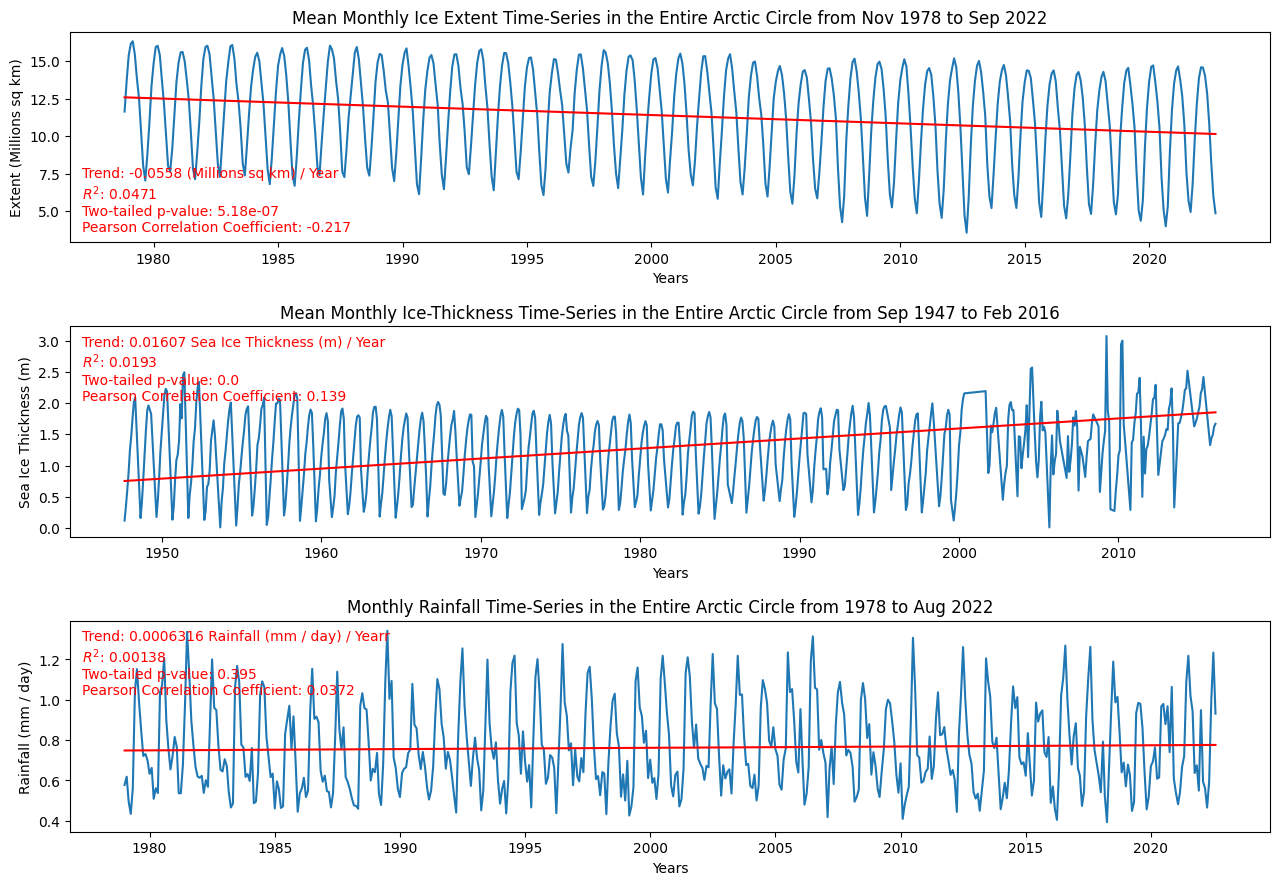

In [274]:
## PLOTTING
# Set up a subplot to hold three graphs in one.
fig4, (ax7, ax8, ax9) = plt.subplots(3,1,figsize=[15,10])

# Plotting the Ice-Extent Subplot
ax7.plot(date_extent, extent)
ax7.plot(date_extent, prediction_extent, color='r')
ax7.set_xlabel("Years")
ax7.set_ylabel("Extent (Millions sq km)")
ax7.set_title("Mean Monthly Ice Extent Time-Series in the Entire Arctic Circle from Nov 1978 to Sep 2022")
ax7.annotate(f"Trend: {round(trend_extent, 4)} (Millions sq km) / Year \n" +
             f"$R^2$: {round(rsquared_extent, 4)} \n" +
             f"Two-tailed p-value: {round(two_pvalue_extent, 9)} \n" +
             f"Pearson Correlation Coefficient: {round(pearson_coefficient_extent, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r')

# Plotting the Ice-Thickness Subplot
ax8.plot(avg_thkns_mean_monthly.index.values, avg_thkns_mean_monthly)
ax8.plot(date_thkns, prediction_thkns, color='r')
ax8.set_xlabel("Years")
ax8.set_ylabel("Sea Ice Thickness (m)")
ax8.set_title("Mean Monthly Ice-Thickness Time-Series in the Entire Arctic Circle from Sep 1947 to Feb 2016")
ax8.annotate(f"Trend: {round(trend_thkns, 5)} Sea Ice Thickness (m) / Year \n" +
             f"$R^2$: {round(rsquared_thkns, 5)} \n" +
             f"Two-tailed p-value: {round(two_pvalue_thkns, 20)} \n" +
             f"Pearson Correlation Coefficient: {round(pearson_coefficient_thkns, 3)}"
             , xy=(0.01, 0.65), xycoords='axes fraction', color='r')

# Plotting the Precipitation Subplot
ax9.plot(date_precip, precip_data)
ax9.plot(date_precip, prediction_precip, color='r')
ax9.set_xlabel("Years")
ax9.set_ylabel("Rainfall (mm / day)")
ax9.set_title("Monthly Rainfall Time-Series in the Entire Arctic Circle from 1978 to Aug 2022")
ax9.annotate(f"Trend: {round(trend_precip, 7)} Rainfall (mm / day) / Yearr \n" +
             f"$R^2$: {round(rsquared_precip, 5)} \n" +
             f"Two-tailed p-value: {round(two_pvalue_precip, 3)} \n" +
             f"Pearson Correlation Coefficient: {round(pearson_coefficient_precip, 4)}"
             , xy=(0.01, 0.65), xycoords='axes fraction', color='r')

# Reference to: https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
# Adjusting the plots so the xlabel doesn't overlap with the titles
plt.subplots_adjust(left=0.1,
                bottom=0.1,
                right=0.9,
                top=0.9,
                wspace=0.2,
                hspace=0.4)

<h3>Ice Extent vs Ice Thickness</h3>

Text(0.01, 0.1, 'Pearson Correlation Coefficient: -0.73385')

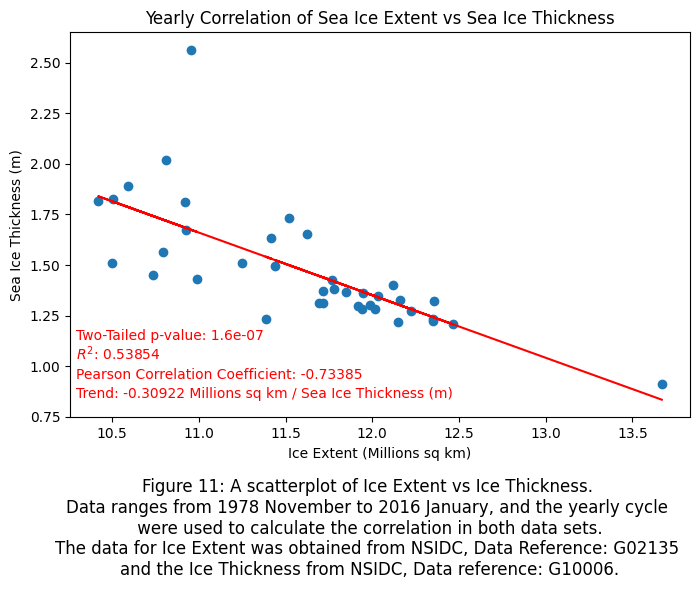

In [275]:
## STATISTICAL ANALYSIS ON ICE_THICKNESS VS ICE_EXTENT

# Need to mask both the ice_thickness data and the ice_extent data to match each other's time range.
ice_thickness = ice_thickness[(ice_thickness.index > '1978-11-01') & (ice_thickness.index < '2016-01-01')]
extent = ice_extent[mask_extent & (ice_extent.index > '1978-11-01') &(ice_extent.index < '2016-01-01')]

# Need to make the two values the same number of data points.
# We want to analyze the yearly values, and therefore take the mean of the yearly values for each.
thkns_values = ice_thickness.groupby(ice_thickness.index.year)['Avg_thkns'].mean()
extent_values = extent.groupby(extent.index.year)['extent'].mean()

## OLS for Ice_Thickness vs Ice_Extent
y = thkns_values
x = extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
x = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
extent_vs_thkns_model = sm.OLS(y, x, missing='drop').fit()

# Attain prediction of the model.
prediction_extent_vs_thkns = extent_vs_thkns_model.predict(x)

# Store the trend, 95% confidence intervals, and Rsquare
trend_extent_vs_thkns = extent_vs_thkns_model.params[1]
conf_extent_vs_thkns = extent_vs_thkns_model.conf_int()[1]
rsquared_extent_vs_thkns = extent_vs_thkns_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
x = extent_values
pearson_extent_vs_thkns = stat.pearsonr(x, y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_extent_vs_thkns = pearson_extent_vs_thkns[0]

# Isolating the two-tailed p-values
two_pvalue_extent_vs_thkns = pearson_extent_vs_thkns[1]

# Plotting the data.
plt.figure(figsize=(8,5))
plt.scatter(extent_values, thkns_values, label="Ice Extent vs Ice Thickness")
plt.plot(extent_values, prediction_extent_vs_thkns, color='r')
plt.title("Yearly Correlation of Sea Ice Extent vs Sea Ice Thickness")
plt.xlabel("Ice Extent (Millions sq km)")
plt.ylabel("Sea Ice Thickness (m)")
plt.figtext(0.5, -0.2, 'Figure 11: A scatterplot of Ice Extent vs Ice Thickness. \n' +
                       'Data ranges from 1978 November to 2016 January, and the yearly cycle \n '+ 
                       "were used to calculate the correlation in both data sets. \n" +
                       'The data for Ice Extent was obtained from NSIDC, Data Reference: G02135 \n' + 
                       "and the Ice Thickness from NSIDC, Data reference: G10006."
            , wrap=True, horizontalalignment='center', fontsize=12)
plt.annotate('Trend: ' + str(round(trend_extent_vs_thkns, 5)) + ' Millions sq km / Sea Ice Thickness (m)', xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('$R^2$: ' + str(round(rsquared_extent_vs_thkns, 5)), xy=(0.01, 0.15), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('Two-Tailed p-value: ' + str(round(two_pvalue_extent_vs_thkns, 8)), xy=(0.01, 0.2), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('Pearson Correlation Coefficient: ' + str(round(pearson_coefficient_extent_vs_thkns, 5)), xy=(0.01, 0.1), xycoords='axes fraction', color='r', fontsize=10)

<h3>Ice Extent vs Precipitation</h3>

Text(0.01, 0.1, 'Pearson Correlation Coefficient: -0.167')

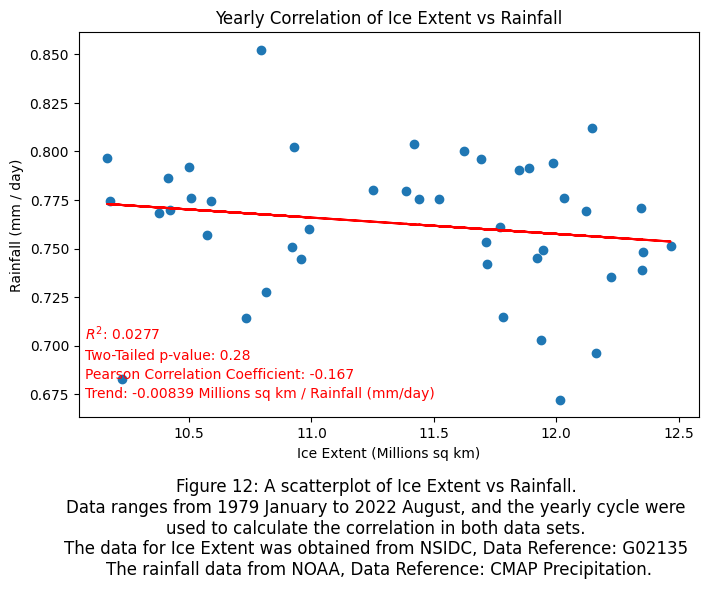

In [276]:
## STATISTICAL ANALYSIS ON ICE_EXTENT VS PRECIPITATION

# Need to mask both the ice_extent data and the ice_extent data to match each other's time range.
precip = precipitation[(precipitation.index >= '1979-01-01') & (precipitation.index <= '2022-08-01')]
extent = ice_extent[mask_extent & (ice_extent.index >= '1979-01-01') &(ice_extent.index <= '2022-08-01')]

# Need to make the two values the same number of data points.
# We want to analyze the yearly values, and therefore take the mean of the yearly values for each.
precip_values = precip.groupby(precip.index.year)['precip'].mean()
extent_values = extent.groupby(extent.index.year)['extent'].mean()

## OLS for Ice_Thickness vs Ice_Extent
y = precip_values
x = extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
x = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
extent_vs_precip_model = sm.OLS(y, x, missing='drop').fit()

# Attain prediction of the model.
prediction_extent_vs_precip = extent_vs_precip_model.predict(x)

# Store the trend, 95% confidence intervals, and Rsquare
trend_extent_vs_precip = extent_vs_precip_model.params[1]
conf_extent_vs_precip = extent_vs_precip_model.conf_int()[1]
rsquared_extent_vs_precip = extent_vs_precip_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
x = extent_values
pearson_extent_vs_precip = stat.pearsonr(x, y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_extent_vs_precip = pearson_extent_vs_precip[0]

# Isolating the two-tailed p-values
two_pvalue_extent_vs_precip = pearson_extent_vs_precip[1]

# Plotting the data.
plt.figure(figsize=(8,5))
plt.scatter(extent_values, precip_values)
plt.plot(extent_values, prediction_extent_vs_precip, color='r')
plt.title("Yearly Correlation of Ice Extent vs Rainfall")
plt.xlabel("Ice Extent (Millions sq km)")
plt.ylabel("Rainfall (mm / day)")
plt.figtext(0.5, -0.2, 'Figure 12: A scatterplot of Ice Extent vs Rainfall. \n' +
            'Data ranges from 1979 January to 2022 August, and the yearly cycle were \n' + 
            'used to calculate the correlation in both data sets. \n' +
            'The data for Ice Extent was obtained from NSIDC, Data Reference: G02135 \n' + 
            'The rainfall data from NOAA, Data Reference: CMAP Precipitation.',
            wrap=True, horizontalalignment='center', fontsize=12)
plt.annotate('Trend: ' + str(round(trend_extent_vs_precip, 5)) +' Millions sq km / Rainfall (mm/day)', xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('$R^2$: ' + str(round(rsquared_extent_vs_precip, 4)), xy=(0.01, 0.2), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('Two-Tailed p-value: ' + str(round(two_pvalue_extent_vs_precip, 3)), xy=(0.01, 0.15), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('Pearson Correlation Coefficient: ' + str(round(pearson_coefficient_extent_vs_precip, 3)), xy=(0.01, 0.1), xycoords='axes fraction', color='r', fontsize=10)

<h3>Ice Thickness vs Precipitation</h3>

Text(0.01, 0.9, 'Pearson Correlation Coefficient: 0.108')

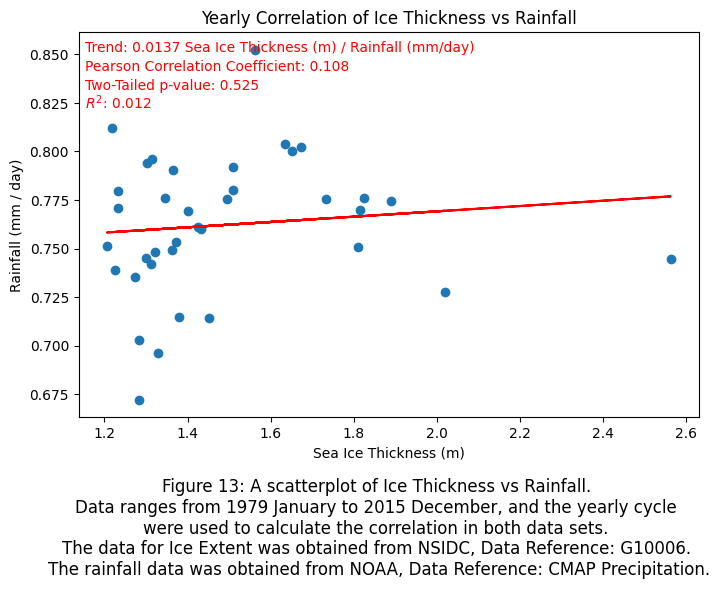

In [277]:
## STATISTICAL ANALYSIS ON ICE_THICKNESS VS PRECIPITATION

# Need to mask both the ice_thickness data and the ice_extent data to match each other's time range.
ice_thickness = ice_thickness[(ice_thickness.index >= '1979-01-01') & (ice_thickness.index < '2016-01-01')]
precip = precipitation[(precipitation.index >= '1979-01-01') & (precipitation.index < '2016-01-01')]

# Need to make the two values the same number of data points.
# We want to analyze the yearly values, and therefore take the mean of the yearly values for each.
precip_values = precip.groupby(precip.index.year)['precip'].mean()
thkns_values = ice_thickness.groupby(ice_thickness.index.year)['Avg_thkns'].mean()

## OLS for Ice_Thickness vs Ice_Extent
y = precip_values
x = thkns_values

# Add a column of ones to the x variables (required for statsmodel regression)
x = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
thkns_vs_precip_model = sm.OLS(y, x, missing='drop').fit()

# Attain prediction of the model.
prediction_thkns_vs_precip = thkns_vs_precip_model.predict(x)

# Store the trend, 95% confidence intervals, and Rsquare
trend_thkns_vs_precip = thkns_vs_precip_model.params[1]
conf_thkns_vs_precip = thkns_vs_precip_model.conf_int()[1]
rsquared_thkns_vs_precip = thkns_vs_precip_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
x = thkns_values
pearson_thkns_vs_precip = stat.pearsonr(x, y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_thkns_vs_precip = pearson_thkns_vs_precip[0]

# Isolating the two-tailed p-values
two_pvalue_thkns_vs_precip = pearson_thkns_vs_precip[1]

# Plotting the data.
plt.figure(figsize=(8,5))
plt.scatter(thkns_values, precip_values)
plt.plot(thkns_values, prediction_thkns_vs_precip, color='r')
plt.title("Yearly Correlation of Ice Thickness vs Rainfall")
plt.xlabel("Sea Ice Thickness (m)")
plt.ylabel("Rainfall (mm / day)")
plt.figtext(0.5, -0.2, 'Figure 13: A scatterplot of Ice Thickness vs Rainfall. \n' +
            'Data ranges from 1979 January to 2015 December, and the yearly cycle \n' + 
            'were used to calculate the correlation in both data sets. \n' +
            'The data for Ice Extent was obtained from NSIDC, Data Reference: G10006. \n' + 
            'The rainfall data was obtained from NOAA, Data Reference: CMAP Precipitation.',
            wrap=True, horizontalalignment='center', fontsize=12)
plt.annotate('Trend: ' + str(round(trend_thkns_vs_precip, 4)) + ' Sea Ice Thickness (m) / Rainfall (mm/day)', xy=(0.01, 0.95), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('$R^2$: ' + str(round(rsquared_thkns_vs_precip, 3)), xy=(0.01, 0.8), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('Two-Tailed p-value: ' + str(round(two_pvalue_thkns_vs_precip, 3)), xy=(0.01, 0.85), xycoords='axes fraction', color='r', fontsize=10)
plt.annotate('Pearson Correlation Coefficient: ' + str(round(pearson_coefficient_thkns_vs_precip, 3)), xy=(0.01, 0.9), xycoords='axes fraction', color='r', fontsize=10)

<hr>

<h3>Multiple Linear Regression</h3>

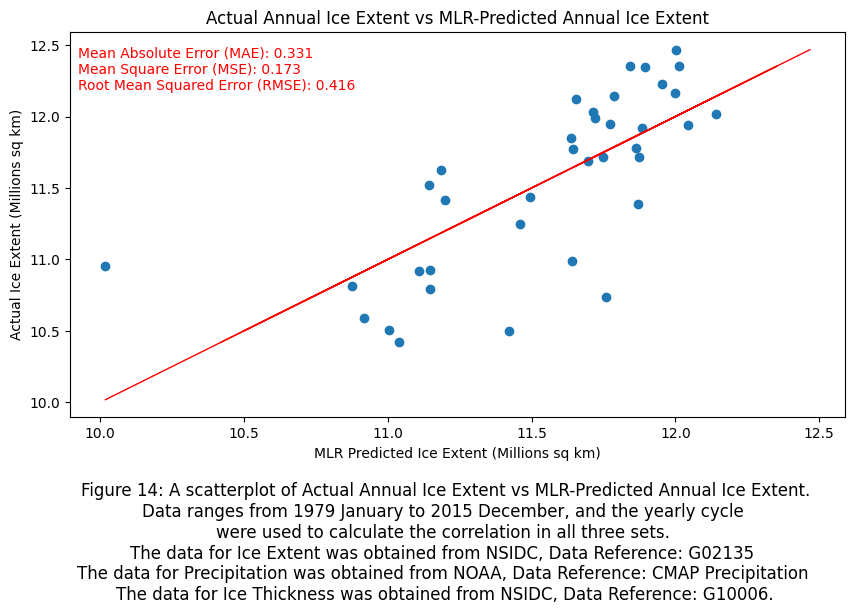

In [278]:
## PERFORMING MULTIPLE LINEAR REGRESSION

# Need to mask all the data to match each other's time range.
extent = ice_extent[mask_extent & (ice_extent.index >= '1979-01-01') &(ice_extent.index < '2016-01-01')]
ice_thickness = ice_thickness[(ice_thickness.index >= '1979-01-01') & (ice_thickness.index < '2016-01-01')]
precip = precipitation[(precipitation.index >= '1979-01-01') & (precipitation.index < '2016-01-01')]

# Extract yearly values from each data to set all the data points to be the same.
precip_values = precip.groupby(precip.index.year)['precip'].mean()
extent_values = extent.groupby(extent.index.year)['extent'].mean()
thkns_values = ice_thickness.groupby(ice_thickness.index.year)['Avg_thkns'].mean()

# Separate DataFrame to merge them together to prepare it fo the x-variable into the Statsmodels.api sm.OLS()
df1 = precip_values
df2 = thkns_values

# Concatenate the two DataFrames into one.
df3 = pd.concat([df1, df2], axis=1)

# Setting up independent and dependent variables for Multiple Linear Regression.
x_icedata = df3[['precip','Avg_thkns']]
y_extent = extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
x_icedata = sm.add_constant(x_icedata)
    
# Fit linear model to training data (drop missing values)
ice_model = sm.OLS(y_extent, x_icedata, missing='drop').fit()

# reg_mlr = LinearRegression().fit(x_mlr,y_gmt)
pred_ice = ice_model.predict(x_icedata)

# Error Metrics
mae = sm.tools.eval_measures.meanabs(pred_ice, y_extent)
mse = sm.tools.eval_measures.mse(pred_ice, y_extent)
rmse = sm.tools.eval_measures.rmse(pred_ice, y_extent)

# Plotting graph
plt.figure(figsize=(10,5))
plt.annotate(f'Mean Absolute Error (MAE): {round(mae, 3)} \n'+ 
             f'Mean Square Error (MSE): {round(mse, 3)} \n' + 
             f'Root Mean Squared Error (RMSE): {round(rmse, 3)}', 
             xy=(0.01, 0.85), xycoords='axes fraction', color='r', fontsize=10)
plt.title('Actual Annual Ice Extent vs MLR-Predicted Annual Ice Extent')
plt.ylabel('Actual Ice Extent (Millions sq km)')
plt.xlabel('MLR Predicted Ice Extent (Millions sq km)')
plt.plot(pred_ice, y_extent, 'o')
plt.plot([pred_ice, y_extent],[pred_ice, y_extent],'r-',linewidth=1)
plt.figtext(0.5, -0.25, 'Figure 14: A scatterplot of Actual Annual Ice Extent vs MLR-Predicted Annual Ice Extent.\n' +
            'Data ranges from 1979 January to 2015 December, and the yearly cycle \n' + 
            'were used to calculate the correlation in all three sets. \n' +
            'The data for Ice Extent was obtained from NSIDC, Data Reference: G02135 \n' + 
            'The data for Precipitation was obtained from NOAA, Data Reference: CMAP Precipitation \n' +
            'The data for Ice Thickness was obtained from NSIDC, Data Reference: G10006.',
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()



<hr>

<h3>Seasonal Analysis Tests for Ice Extent vs Ice Thickness</h3>

In [279]:
## STATISTICAL ANALYSIS ON ICE EXTENT VS ICE THICKNESS

# Need to mask both the ice_thickness data and the ice_extent data to match each other's time range.
ice_thickness = ice_thickness[(ice_thickness.index >= '1978-01-01') & (ice_thickness.index < '2016-01-01')]
extent = ice_extent[mask_extent & (ice_extent.index >= '1979-01-01') &(ice_extent.index < '2016-01-01')]

# Separate the values attained from above into its respective seasons.

# Winter - December, January, February
# Spring - March, April, May
# Summer - June, July, August
# Autumn - September, Octobr, November
winter_extent_mask = (extent.index.month < 3) | (extent.index.month == 12)
spring_extent_mask = (extent.index.month >= 3) & (extent.index.month < 6)
summer_extent_mask = (extent.index.month >= 6) & (extent.index.month < 9)
autumn_extent_mask = (extent.index.month >= 9) & (extent.index.month < 12)

winter_extent = extent[winter_extent_mask]
spring_extent = extent[spring_extent_mask]
summer_extent = extent[summer_extent_mask]
autumn_extent = extent[autumn_extent_mask]

# ------------------------------------ Y
winter_thkns_mask = (ice_thickness.index.month < 3) | (ice_thickness.index.month == 12)
spring_thkns_mask = (ice_thickness.index.month >= 3) & (ice_thickness.index.month < 6)
summer_thkns_mask = (ice_thickness.index.month >= 6) & (ice_thickness.index.month < 9)
autumn_thkns_mask = (ice_thickness.index.month >= 9) & (ice_thickness.index.month < 12)

winter_thkns = ice_thickness[winter_thkns_mask]
spring_thkns = ice_thickness[spring_thkns_mask]
summer_thkns = ice_thickness[summer_thkns_mask]
autumn_thkns = ice_thickness[autumn_thkns_mask]


# Need to make the two values the same number of data points.
# We want to analyze the monthly values to segregate it into the different seasons.
winter_thkns_values = winter_thkns['Avg_thkns'].groupby(winter_thkns['Avg_thkns'].index.to_period('Y')).mean()
spring_thkns_values = spring_thkns['Avg_thkns'].groupby(spring_thkns['Avg_thkns'].index.to_period('Y')).mean()
spring_thkns_values = spring_thkns_values[spring_thkns_values.index.year != 2001]
summer_thkns_values = summer_thkns['Avg_thkns'].groupby(summer_thkns['Avg_thkns'].index.to_period('Y')).mean()
summer_thkns_values = summer_thkns_values[(summer_thkns_values.index.year != 2000) 
                                            & (summer_thkns_values.index.year != 2002)
                                            & (summer_thkns_values.index.year < 2014)]
autumn_thkns_values = autumn_thkns['Avg_thkns'].groupby(autumn_thkns['Avg_thkns'].index.to_period('Y')).mean()
autumn_thkns_values = autumn_thkns_values[autumn_thkns_values.index.year != 2000]


winter_extent_values = winter_extent['extent'].groupby(winter_extent['extent'].index.to_period('Y')).mean()
spring_extent_values = spring_extent['extent'].groupby(spring_extent['extent'].index.to_period('Y')).mean()
spring_extent_values = spring_extent_values[spring_extent_values.index.year != 2001]
summer_extent_values = summer_extent['extent'].groupby(summer_extent['extent'].index.to_period('Y')).mean()
summer_extent_values = summer_extent_values[(summer_extent_values.index.year != 2000) 
                                            & (summer_extent_values.index.year != 2002)
                                            & (summer_extent_values.index.year < 2014)]
autumn_extent_values = autumn_extent['extent'].groupby(autumn_extent['extent'].index.to_period('Y')).mean()
autumn_extent_values = autumn_extent_values[autumn_extent_values.index.year != 2000]

In [280]:
## OLS for ICE EXTENT VS ICE THICKNESS (WINTER)
winter_y = winter_thkns_values
winter_OS = winter_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
winter_OS = sm.add_constant(winter_OS)

# Fit linear model to training data (drop missing values)
winter_model = sm.OLS(winter_y, winter_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_winter = winter_model.predict(winter_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_winter = winter_model.params[1]
conf_winter = winter_model.conf_int()[1]
rsquared_winter = winter_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
winter_x = winter_extent_values
pearson_winter = stat.pearsonr(winter_x, winter_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_winter = pearson_winter[0]

# Isolating the two-tailed p-values
two_pvalue_winter = pearson_winter[1]



In [281]:
## OLS for ICE EXTENT VS ICE THICKNESS (SPRING)
spring_y = spring_thkns_values
spring_OS = spring_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
spring_OS = sm.add_constant(spring_OS)

# Fit linear model to training data (drop missing values)
spring_model = sm.OLS(spring_y, spring_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_spring = spring_model.predict(spring_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_spring = spring_model.params[1]
conf_spring = spring_model.conf_int()[1]
rsquared_spring = spring_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
spring_x = spring_extent_values
pearson_spring = stat.pearsonr(spring_x, spring_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_spring = pearson_spring[0]

# Isolating the two-tailed p-values
two_pvalue_spring = pearson_spring[1]

In [282]:
## OLS for ICE EXTENT VS ICE THICKNESS (SUMMER)
summer_y = summer_thkns_values
summer_OS = summer_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
summer_OS = sm.add_constant(summer_OS)

# Fit linear model to training data (drop missing values)
summer_model = sm.OLS(summer_y, summer_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_summer = summer_model.predict(summer_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_summer = summer_model.params[1]
conf_summer = summer_model.conf_int()[1]
rsquared_summer = summer_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
summer_x = summer_extent_values
pearson_summer = stat.pearsonr(summer_x, summer_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_summer = pearson_summer[0]

# Isolating the two-tailed p-values
two_pvalue_summer = pearson_summer[1]

In [283]:
## OLS for ICE EXTENT VS ICE THICKNESS (AUTUMN)
autumn_y = autumn_thkns_values
autumn_OS = autumn_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
autumn_OS = sm.add_constant(autumn_OS)

# Fit linear model to training data (drop missing values)
autumn_model = sm.OLS(autumn_y, autumn_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_autumn = autumn_model.predict(autumn_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_autumn = autumn_model.params[1]
conf_autumn = autumn_model.conf_int()[1]
rsquared_autumn = autumn_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
autumn_x = autumn_extent_values
pearson_autumn = stat.pearsonr(autumn_x, autumn_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_autumn = pearson_autumn[0]

# Isolating the two-tailed p-values
two_pvalue_autumn = pearson_autumn[1]

Text(0.5, -0.1, 'Figure 15: Yearly Seasonal Ice Extent vs Ice Thickness. \nData ranges from 1979 January to 2015 December, and the yearly cycle \n were used to calculate the correlation in both data sets. \nData is split into 4 quadrants, Winter, Spring, Summer and Autumn. \np-value is a Two-tailed p-value from the Pearsons Correlation Coefficient test. \nThe data for Ice Extent was obtained from NSIDC, Data Reference: G02135 \nand the Ice Thickness from NSIDC, Data reference: G10006.')

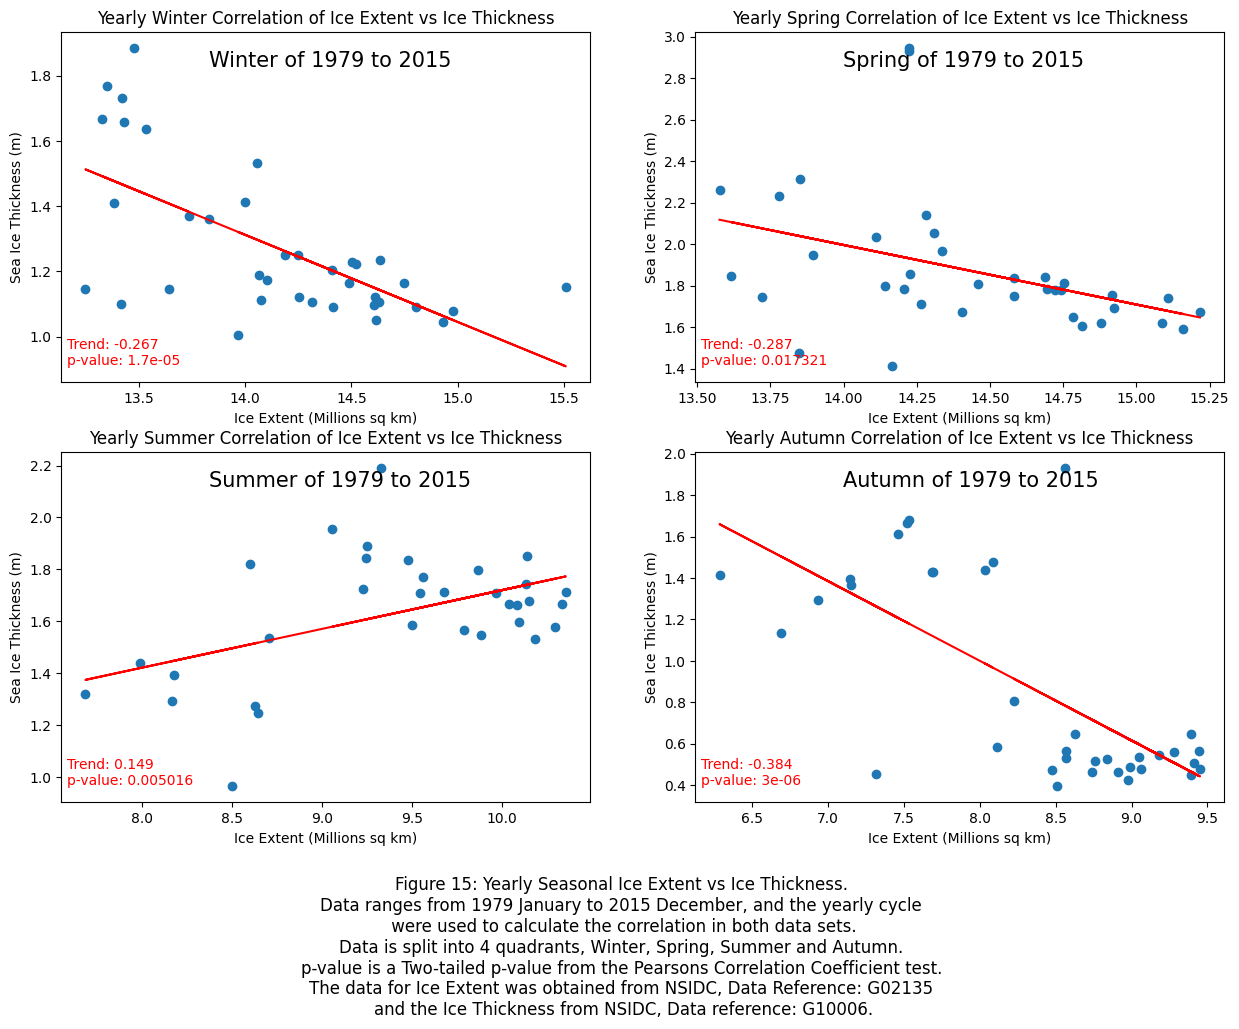

In [284]:
# Plotting the graph
fig5, ((axW1, axW2), (axW3, axW4)) = plt.subplots(2,2,figsize=[15,10])

axW1.scatter(winter_extent_values, winter_thkns_values)
axW1.plot(winter_extent_values, prediction_winter, color='r')
axW1.set_xlabel("Ice Extent (Millions sq km)")
axW1.set_ylabel("Sea Ice Thickness (m)")
axW1.set_title("Yearly Winter Correlation of Ice Extent vs Ice Thickness")
axW1.annotate(f"Trend: {round(trend_winter, 3)}\n" + 
              f"p-value: {round(two_pvalue_winter, 6)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axW1.annotate("Winter of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axW2.scatter(spring_extent_values, spring_thkns_values)
axW2.plot(spring_extent_values, prediction_spring, color='r')
axW2.set_xlabel("Ice Extent (Millions sq km)")
axW2.set_ylabel("Sea Ice Thickness (m)")
axW2.set_title("Yearly Spring Correlation of Ice Extent vs Ice Thickness")
axW2.annotate(f"Trend: {round(trend_spring, 3)}\n" + 
              f"p-value: {round(two_pvalue_spring, 6)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axW2.annotate("Spring of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axW3.scatter(summer_extent_values, summer_thkns_values)
axW3.plot(summer_extent_values, prediction_summer, color='r')
axW3.set_xlabel("Ice Extent (Millions sq km)")
axW3.set_ylabel("Sea Ice Thickness (m)")
axW3.set_title("Yearly Summer Correlation of Ice Extent vs Ice Thickness")
axW3.annotate(f"Trend: {round(trend_summer, 3)}\n" + 
              f"p-value: {round(two_pvalue_summer, 6)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axW3.annotate("Summer of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axW4.scatter(autumn_extent_values, autumn_thkns_values)
axW4.plot(autumn_extent_values, prediction_autumn, color='r')
axW4.set_xlabel("Ice Extent (Millions sq km)")
axW4.set_ylabel("Sea Ice Thickness (m)")
axW4.set_title("Yearly Autumn Correlation of Ice Extent vs Ice Thickness")
axW4.annotate(f"Trend: {round(trend_autumn, 3)}\n" + 
              f"p-value: {round(two_pvalue_autumn, 6)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axW4.annotate("Autumn of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

plt.figtext(0.5, -0.1, 'Figure 15: Yearly Seasonal Ice Extent vs Ice Thickness. \n' +
                       'Data ranges from 1979 January to 2015 December, and the yearly cycle \n '+ 
                       "were used to calculate the correlation in both data sets. \n" +
                       "Data is split into 4 quadrants, Winter, Spring, Summer and Autumn. \n" +
                       "p-value is a Two-tailed p-value from the Pearsons Correlation Coefficient test. \n" +
                       'The data for Ice Extent was obtained from NSIDC, Data Reference: G02135 \n' + 
                       "and the Ice Thickness from NSIDC, Data reference: G10006."
            , wrap=True, horizontalalignment='center', fontsize=12)

<h3>Seasonal Analysis Tests for Ice Extent vs Precipitation</h3>

In [285]:
## STATISTICAL ANALYSIS ON ICE_EXTENT VS PRECIPITATION

# Need to mask both the data to match each other's time range.
precip = precipitation[(precipitation.index >= '1979-01-01') & (precipitation.index <= '2022-08-01')]
extent = ice_extent[mask_extent & (ice_extent.index >= '1979-01-01') &(ice_extent.index <= '2022-08-01')]

# Separate the values attained from above into its respective seasons.

# Winter - December, January, February
# Spring - March, April, May
# Summer - June, July, August
# Autumn - September, Octobr, November
winter_extent_mask = (extent.index.month < 3) | (extent.index.month == 12)
spring_extent_mask = (extent.index.month >= 3) & (extent.index.month < 6)
summer_extent_mask = (extent.index.month >= 6) & (extent.index.month < 9)
autumn_extent_mask = (extent.index.month >= 9) & (extent.index.month < 12)

winter_extent = extent[winter_extent_mask]
spring_extent = extent[spring_extent_mask]
summer_extent = extent[summer_extent_mask]
autumn_extent = extent[autumn_extent_mask]

# ------------------------------------ Y
winter_precip_mask = (precip.index.month < 3) | (precip.index.month == 12)
spring_precip_mask = (precip.index.month >= 3) & (precip.index.month < 6)
summer_precip_mask = (precip.index.month >= 6) & (precip.index.month < 9)
autumn_precip_mask = (precip.index.month >= 9) & (precip.index.month < 12)

winter_precip = precip[winter_precip_mask]
spring_precip = precip[spring_precip_mask]
summer_precip = precip[summer_precip_mask]
autumn_precip = precip[autumn_precip_mask]


# Need to make the two values the same number of data points.
# We want to analyze the monthly values to segregate it into the different seasons.
winter_precip_values = winter_precip['precip'].groupby(winter_precip['precip'].index.to_period('Y')).mean()
spring_precip_values = spring_precip['precip'].groupby(spring_precip['precip'].index.to_period('Y')).mean()
summer_precip_values = summer_precip['precip'].groupby(summer_precip['precip'].index.to_period('Y')).mean()
autumn_precip_values = autumn_precip['precip'].groupby(autumn_precip['precip'].index.to_period('Y')).mean()


winter_extent_values = winter_extent['extent'].groupby(winter_extent['extent'].index.to_period('Y')).mean()
spring_extent_values = spring_extent['extent'].groupby(spring_extent['extent'].index.to_period('Y')).mean()
summer_extent_values = summer_extent['extent'].groupby(summer_extent['extent'].index.to_period('Y')).mean()
autumn_extent_values = autumn_extent['extent'].groupby(autumn_extent['extent'].index.to_period('Y')).mean()

In [286]:
## OLS for ICE EXTENT VS PRECIPITATION (WINTER)

winter_y = winter_precip_values
winter_OS = winter_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
winter_OS = sm.add_constant(winter_OS)

# Fit linear model to training data (drop missing values)
winter_model = sm.OLS(winter_y, winter_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_winter = winter_model.predict(winter_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_winter = winter_model.params[1]
conf_winter = winter_model.conf_int()[1]
rsquared_winter = winter_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
winter_x = winter_extent_values
pearson_winter = stat.pearsonr(winter_x, winter_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_winter = pearson_winter[0]

# Isolating the two-tailed p-values
two_pvalue_winter = pearson_winter[1]



In [287]:
## OLS for ICE EXTENT vs PRECIPITATION (SPRING)
spring_y = spring_precip_values
spring_OS = spring_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
spring_OS = sm.add_constant(spring_OS)

# Fit linear model to training data (drop missing values)
spring_model = sm.OLS(spring_y, spring_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_spring = spring_model.predict(spring_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_spring = spring_model.params[1]
conf_spring = spring_model.conf_int()[1]
rsquared_spring = spring_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
spring_x = spring_extent_values
pearson_spring = stat.pearsonr(spring_x, spring_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_spring = pearson_spring[0]

# Isolating the two-tailed p-values
two_pvalue_spring = pearson_spring[1]

In [288]:
## OLS for ICE EXTENT VS PRECIPITATION (SUMMER)
summer_y = summer_precip_values
summer_OS = summer_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
summer_OS = sm.add_constant(summer_OS)

# Fit linear model to training data (drop missing values)
summer_model = sm.OLS(summer_y, summer_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_summer = summer_model.predict(summer_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_summer = summer_model.params[1]
conf_summer = summer_model.conf_int()[1]
rsquared_summer = summer_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
summer_x = summer_extent_values
pearson_summer = stat.pearsonr(summer_x, summer_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_summer = pearson_summer[0]

# Isolating the two-tailed p-values
two_pvalue_summer = pearson_summer[1]

In [289]:
## OLS for ICE EXTENT VS PRECIPITATION (AUTUMN)
autumn_y = autumn_precip_values
autumn_OS = autumn_extent_values

# Add a column of ones to the x variables (required for statsmodel regression)
autumn_OS = sm.add_constant(autumn_OS)

# Fit linear model to training data (drop missing values)
autumn_model = sm.OLS(autumn_y, autumn_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_autumn = autumn_model.predict(autumn_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_autumn = autumn_model.params[1]
conf_autumn = autumn_model.conf_int()[1]
rsquared_autumn = autumn_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
autumn_x = autumn_extent_values
pearson_autumn = stat.pearsonr(autumn_x, autumn_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_autumn = pearson_autumn[0]

# Isolating the two-tailed p-values
two_pvalue_autumn = pearson_autumn[1]

Text(0.5, -0.1, 'Figure 16: Yearly Seasonal Ice Extent vs Rainfall. \nData ranges from 1979 January to 2022 August, and the yearly cycle \n were used to calculate the correlation in both data sets. \nData is split into 4 quadrants, Winter, Spring, Summer and Autumn. \np-value is a Two-tailed p-value from the Pearsons Correlation Coefficient test. \nThe data for Ice Extent was obtained from NSIDC, Data Reference: G02135 \nand the rainfall from NOAA, Data reference: CMAP Precipitation.')

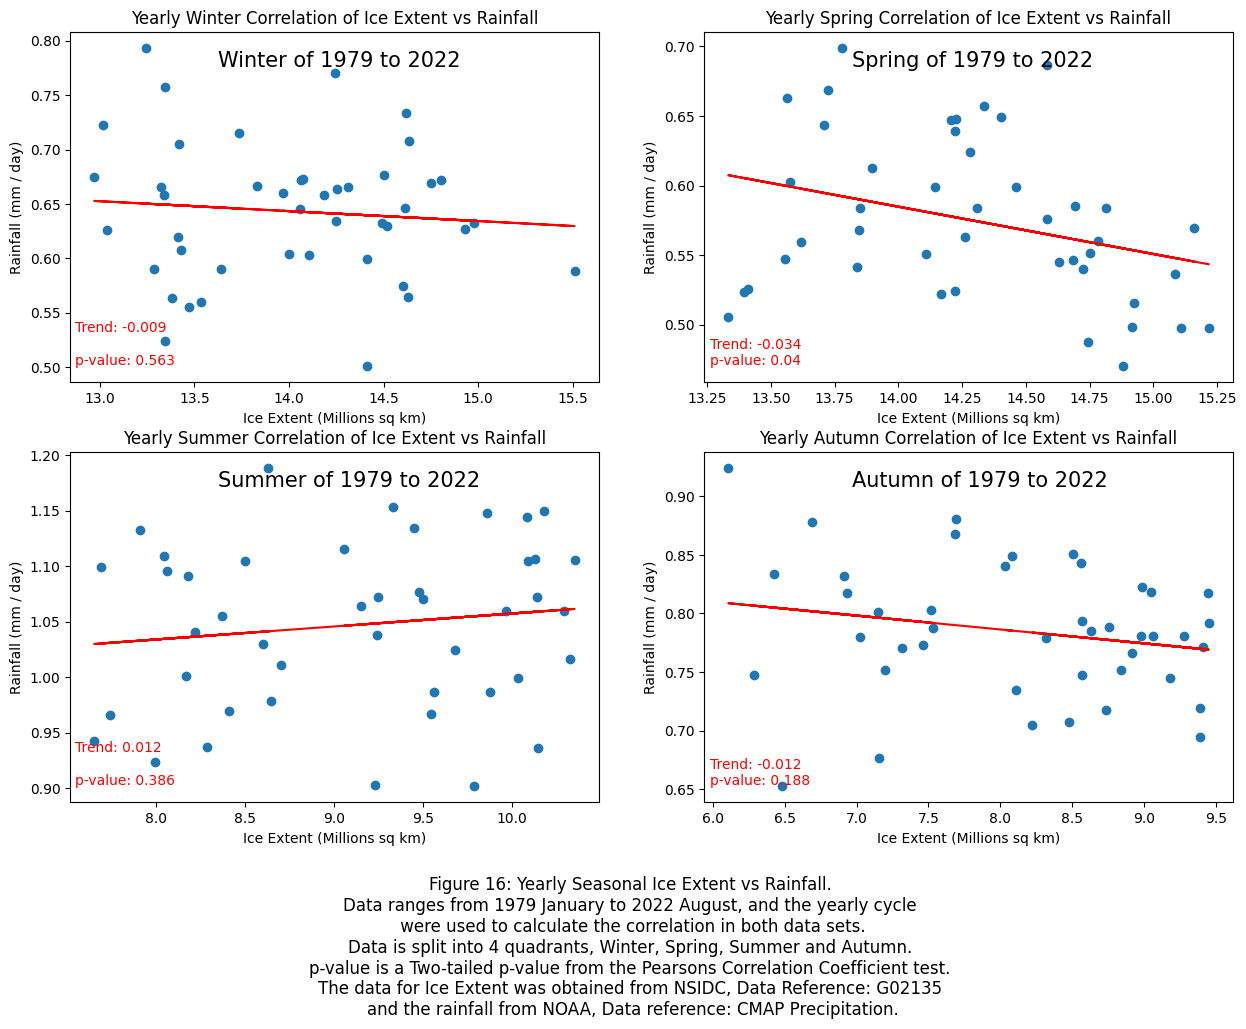

In [290]:
# Plotting the graph
fig6, ((axY1, axY2), (axY3, axY4)) = plt.subplots(2,2,figsize=[15,10])

axY1.scatter(winter_extent_values, winter_precip_values)
axY1.plot(winter_extent_values, prediction_winter, color='r')
axY1.set_xlabel("Ice Extent (Millions sq km)")
axY1.set_ylabel("Rainfall (mm / day)")
axY1.set_title("Yearly Winter Correlation of Ice Extent vs Rainfall")
axY1.annotate(f"Trend: {round(trend_winter, 3)}\n\n" + 
              f"p-value: {round(two_pvalue_winter, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axY1.annotate("Winter of 1979 to 2022", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axY2.scatter(spring_extent_values, spring_precip_values)
axY2.plot(spring_extent_values, prediction_spring, color='r')
axY2.set_xlabel("Ice Extent (Millions sq km)")
axY2.set_ylabel("Rainfall (mm / day)")
axY2.set_title("Yearly Spring Correlation of Ice Extent vs Rainfall")
axY2.annotate(f"Trend: {round(trend_spring, 3)}\n" + 
              f"p-value: {round(two_pvalue_spring, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axY2.annotate("Spring of 1979 to 2022", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axY3.scatter(summer_extent_values, summer_precip_values)
axY3.plot(summer_extent_values, prediction_summer, color='r')
axY3.set_xlabel("Ice Extent (Millions sq km)")
axY3.set_ylabel("Rainfall (mm / day)")
axY3.set_title("Yearly Summer Correlation of Ice Extent vs Rainfall")
axY3.annotate(f"Trend: {round(trend_summer, 3)}\n\n" + 
              f"p-value: {round(two_pvalue_summer, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axY3.annotate("Summer of 1979 to 2022", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axY4.scatter(autumn_extent_values, autumn_precip_values)
axY4.plot(autumn_extent_values, prediction_autumn, color='r')
axY4.set_xlabel("Ice Extent (Millions sq km)")
axY4.set_ylabel("Rainfall (mm / day)")
axY4.set_title("Yearly Autumn Correlation of Ice Extent vs Rainfall")
axY4.annotate(f"Trend: {round(trend_autumn, 3)}\n" + 
              f"p-value: {round(two_pvalue_autumn, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axY4.annotate("Autumn of 1979 to 2022", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

plt.figtext(0.5, -0.1, 'Figure 16: Yearly Seasonal Ice Extent vs Rainfall. \n' +
                       'Data ranges from 1979 January to 2022 August, and the yearly cycle \n '+ 
                       "were used to calculate the correlation in both data sets. \n" +
                       "Data is split into 4 quadrants, Winter, Spring, Summer and Autumn. \n" +
                       "p-value is a Two-tailed p-value from the Pearsons Correlation Coefficient test. \n" +
                       'The data for Ice Extent was obtained from NSIDC, Data Reference: G02135 \n' + 
                       "and the rainfall from NOAA, Data reference: CMAP Precipitation."
            , wrap=True, horizontalalignment='center', fontsize=12)

<h3>Seasonal Analysis Tests for Precipitation vs Ice Thickness</h3>

In [291]:
## STATISTICAL ANALYSIS ON PRECIPITATION VS ICE THICKNESS

# Need to mask both the data to match each other's time range.
ice_thickness = ice_thickness[(ice_thickness.index >= '1979-01-01') & (ice_thickness.index < '2016-01-01')]
precip = precipitation[(precipitation.index >= '1979-01-01') & (precipitation.index < '2016-01-01')]

# Separate the values attained from above into its respective seasons.

# Winter - December, January, February
# Spring - March, April, May
# Summer - June, July, August
# Autumn - September, Octobr, November
winter_precip_mask = (precip.index.month < 3) | (precip.index.month == 12)
spring_precip_mask = (precip.index.month >= 3) & (precip.index.month < 6)
summer_precip_mask = (precip.index.month >= 6) & (precip.index.month < 9)
autumn_precip_mask = (precip.index.month >= 9) & (precip.index.month < 12)

winter_precip = precip[winter_precip_mask]
spring_precip = precip[spring_precip_mask]
summer_precip = precip[summer_precip_mask]
autumn_precip = precip[autumn_precip_mask]

# ------------------------------------ Y
winter_thkns_mask = (ice_thickness.index.month < 3) | (ice_thickness.index.month == 12)
spring_thkns_mask = (ice_thickness.index.month >= 3) & (ice_thickness.index.month < 6)
summer_thkns_mask = (ice_thickness.index.month >= 6) & (ice_thickness.index.month < 9)
autumn_thkns_mask = (ice_thickness.index.month >= 9) & (ice_thickness.index.month < 12)

winter_thkns = ice_thickness[winter_thkns_mask]
spring_thkns = ice_thickness[spring_thkns_mask]
summer_thkns = ice_thickness[summer_thkns_mask]
autumn_thkns = ice_thickness[autumn_thkns_mask]


# Need to make the two values the same number of data points.
# We want to analyze the monthly values to segregate it into the different seasons.
winter_thkns_values = winter_thkns['Avg_thkns'].groupby(winter_thkns['Avg_thkns'].index.to_period('Y')).mean()
spring_thkns_values = spring_thkns['Avg_thkns'].groupby(spring_thkns['Avg_thkns'].index.to_period('Y')).mean()
spring_thkns_values = spring_thkns_values[spring_thkns_values.index.year != 2001]
summer_thkns_values = summer_thkns['Avg_thkns'].groupby(summer_thkns['Avg_thkns'].index.to_period('Y')).mean()
summer_thkns_values = summer_thkns_values[(summer_thkns_values.index.year != 2000) 
                                            & (summer_thkns_values.index.year != 2002)
                                            & (summer_thkns_values.index.year < 2014)]
autumn_thkns_values = autumn_thkns['Avg_thkns'].groupby(autumn_thkns['Avg_thkns'].index.to_period('Y')).mean()
autumn_thkns_values = autumn_thkns_values[autumn_thkns_values.index.year != 2000]

winter_precip_values = winter_precip['precip'].groupby(winter_precip['precip'].index.to_period('Y')).mean()
spring_precip_values = spring_precip['precip'].groupby(spring_precip['precip'].index.to_period('Y')).mean()
spring_precip_values = spring_precip_values[spring_precip_values.index.year != 2001]
summer_precip_values = summer_precip['precip'].groupby(summer_precip['precip'].index.to_period('Y')).mean()
summer_precip_values = summer_precip_values[(summer_precip_values.index.year != 2000) 
                                            & (summer_precip_values.index.year != 2002)
                                            & (summer_precip_values.index.year < 2014)]
autumn_precip_values = autumn_precip['precip'].groupby(autumn_precip['precip'].index.to_period('Y')).mean()
autumn_precip_values = autumn_precip_values[autumn_precip_values.index.year != 2000]


In [292]:
## OLS for PRECIPITATION VS ICE THICKNESS (WINTER)
winter_y = winter_thkns_values
winter_OS = winter_precip_values

# Add a column of ones to the x variables (required for statsmodel regression)
winter_OS = sm.add_constant(winter_OS)

# Fit linear model to training data (drop missing values)
winter_model = sm.OLS(winter_y, winter_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_winter = winter_model.predict(winter_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_winter = winter_model.params[1]
conf_winter = winter_model.conf_int()[1]
rsquared_winter = winter_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
winter_x = winter_precip_values
pearson_winter = stat.pearsonr(winter_x, winter_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_winter = pearson_winter[0]

# Isolating the two-tailed p-values
two_pvalue_winter = pearson_winter[1]



In [293]:
## OLS for PRECIPITATION VS ICE THICKNESS (SPRING)
spring_y = spring_thkns_values
spring_OS = spring_precip_values

# Add a column of ones to the x variables (required for statsmodel regression)
spring_OS = sm.add_constant(spring_OS)

# Fit linear model to training data (drop missing values)
spring_model = sm.OLS(spring_y, spring_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_spring = spring_model.predict(spring_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_spring = spring_model.params[1]
conf_spring = spring_model.conf_int()[1]
rsquared_spring = spring_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
spring_x = spring_precip_values
pearson_spring = stat.pearsonr(spring_x, spring_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_spring = pearson_spring[0]

# Isolating the two-tailed p-values
two_pvalue_spring = pearson_spring[1]

In [294]:
## OLS for PRECIPITATION VS ICE THICKNESS (SUMMER)
summer_y = summer_thkns_values
summer_OS = summer_precip_values

# Add a column of ones to the x variables (required for statsmodel regression)
summer_OS = sm.add_constant(summer_OS)

# Fit linear model to training data (drop missing values)
summer_model = sm.OLS(summer_y, summer_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_summer = summer_model.predict(summer_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_summer = summer_model.params[1]
conf_summer = summer_model.conf_int()[1]
rsquared_summer = summer_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
summer_x = summer_precip_values
pearson_summer = stat.pearsonr(summer_x, summer_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_summer = pearson_summer[0]

# Isolating the two-tailed p-values
two_pvalue_summer = pearson_summer[1]

In [295]:
## OLS for PRECIPITATION VS ICE THICKNESS (AUTUMN)
autumn_y = autumn_thkns_values
autumn_OS = autumn_precip_values

# Add a column of ones to the x variables (required for statsmodel regression)
autumn_OS = sm.add_constant(autumn_OS)

# Fit linear model to training data (drop missing values)
autumn_model = sm.OLS(autumn_y, autumn_OS, missing='drop').fit()

# Attain prediction of the model.
prediction_autumn = autumn_model.predict(autumn_OS)

# Store the trend, 95% confidence intervals, and Rsquare
trend_autumn = autumn_model.params[1]
conf_autumn = autumn_model.conf_int()[1]
rsquared_autumn = autumn_model.rsquared

# Performing the Pearson's Correlation measure on the two data sets.
autumn_x = autumn_precip_values
pearson_autumn = stat.pearsonr(autumn_x, autumn_y)

# Isolating the Pearson's Correlation Coefficient
pearson_coefficient_autumn = pearson_autumn[0]

# Isolating the two-tailed p-values
two_pvalue_autumn = pearson_autumn[1]

Text(0.5, -0.1, 'Figure 17: Yearly Seasonal Rainfall vs Ice Thickness. \nData ranges from 1979 January to 2015 December, and the yearly cycle \n were used to calculate the correlation in both data sets. \nData is split into 4 quadrants, Winter, Spring, Summer and Autumn. \np-value is a Two-tailed p-value from the Pearsons Correlation Coefficient test. \nThe data for rainfall was obtained from NOAA, Data Reference: CMAP Precipitation \nand the Ice Thickness from NSIDC, Data reference: G10006.')

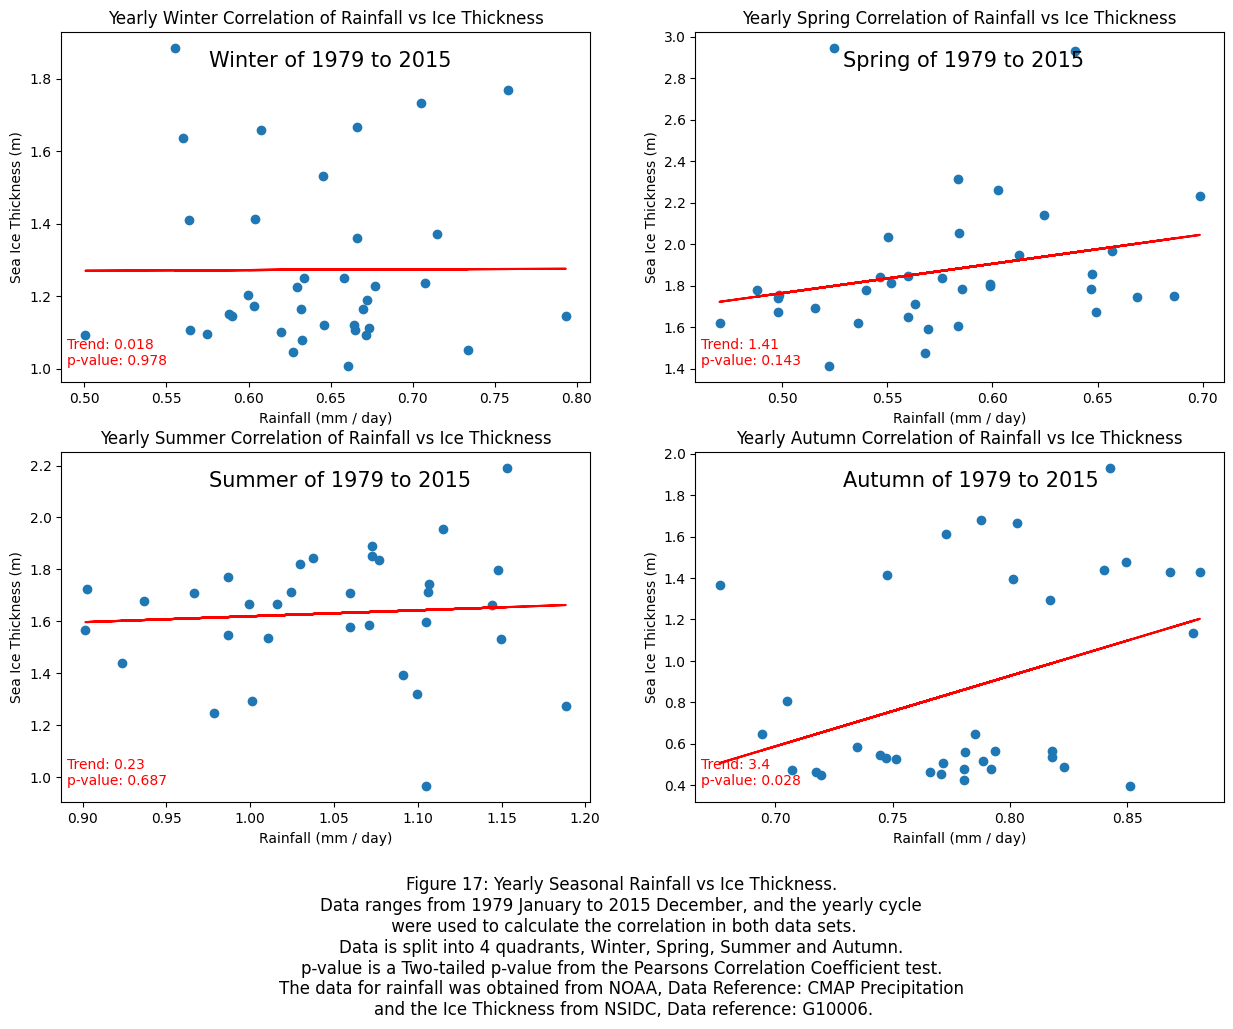

In [296]:
# Plotting the graph
fig7, ((axZ1, axZ2), (axZ3, axZ4)) = plt.subplots(2,2,figsize=[15,10])

axZ1.scatter(winter_precip_values, winter_thkns_values)
axZ1.plot(winter_precip_values, prediction_winter, color='r')
axZ1.set_xlabel("Rainfall (mm / day)")
axZ1.set_ylabel("Sea Ice Thickness (m)")
axZ1.set_title("Yearly Winter Correlation of Rainfall vs Ice Thickness")
axZ1.annotate(f"Trend: {round(trend_winter, 3)}\n" + 
              f"p-value: {round(two_pvalue_winter, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axZ1.annotate("Winter of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axZ2.scatter(spring_precip_values, spring_thkns_values)
axZ2.plot(spring_precip_values, prediction_spring, color='r')
axZ2.set_xlabel("Rainfall (mm / day)")
axZ2.set_ylabel("Sea Ice Thickness (m)")
axZ2.set_title("Yearly Spring Correlation of Rainfall vs Ice Thickness")
axZ2.annotate(f"Trend: {round(trend_spring, 2)}\n" + 
              f"p-value: {round(two_pvalue_spring, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axZ2.annotate("Spring of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axZ3.scatter(summer_precip_values, summer_thkns_values)
axZ3.plot(summer_precip_values, prediction_summer, color='r')
axZ3.set_xlabel("Rainfall (mm / day)")
axZ3.set_ylabel("Sea Ice Thickness (m)")
axZ3.set_title("Yearly Summer Correlation of Rainfall vs Ice Thickness")
axZ3.annotate(f"Trend: {round(trend_summer, 3)}\n" + 
              f"p-value: {round(two_pvalue_summer, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axZ3.annotate("Summer of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

axZ4.scatter(autumn_precip_values, autumn_thkns_values)
axZ4.plot(autumn_precip_values, prediction_autumn, color='r')
axZ4.set_xlabel("Rainfall (mm / day)")
axZ4.set_ylabel("Sea Ice Thickness (m)")
axZ4.set_title("Yearly Autumn Correlation of Rainfall vs Ice Thickness")
axZ4.annotate(f"Trend: {round(trend_autumn, 2)}\n" + 
              f"p-value: {round(two_pvalue_autumn, 3)}"
             , xy=(0.01, 0.05), xycoords='axes fraction', color='r', fontsize=10)
axZ4.annotate("Autumn of 1979 to 2015", xy=(0.28, 0.9), xycoords='axes fraction', fontsize=15)

plt.figtext(0.5, -0.1, 'Figure 17: Yearly Seasonal Rainfall vs Ice Thickness. \n' +
                       'Data ranges from 1979 January to 2015 December, and the yearly cycle \n '+ 
                       "were used to calculate the correlation in both data sets. \n" +
                       "Data is split into 4 quadrants, Winter, Spring, Summer and Autumn. \n" +
                       "p-value is a Two-tailed p-value from the Pearsons Correlation Coefficient test. \n" +
                       'The data for rainfall was obtained from NOAA, Data Reference: CMAP Precipitation \n' + 
                       "and the Ice Thickness from NSIDC, Data reference: G10006."
            , wrap=True, horizontalalignment='center', fontsize=12)